In [1]:
import pandas as pd

In [2]:
# import csv files

daily_20_21_df = pd.read_csv('CBECI Old Version 2020-2021 Total Daily Energy Consumption.csv')
daily_20_21_v2_df = pd.read_csv('CBECI New Version 2020-2021 Total Daily Energy Consumption.csv')
daily_22_df = pd.read_csv('CBECI Old Version 2022 Total Daily Energy Consumption.csv')
daily_23_df = pd.read_csv('CBECI Old Version 2023 Total Daily Energy Consumption Incomplete.csv')

In [3]:
daily_20_21_df # display preview of the older version of CBECI data (used in Chamanara et al)

Timestamp       Date and Time  power GUESS, GW  \
0    1577836800  2020-01-01 0:00:00         8.185817   
1    1577923200  2020-01-02 0:00:00         8.061507   
2    1578009600  2020-01-03 0:00:00         8.322102   
3    1578096000  2020-01-04 0:00:00         8.545083   
4    1578182400  2020-01-05 0:00:00         8.683946   
..          ...                 ...              ...   
726  1640563200  2021-12-27 0:00:00        13.662334   
727  1640649600  2021-12-28 0:00:00        13.313983   
728  1640736000  2021-12-29 0:00:00        13.280707   
729  1640822400  2021-12-30 0:00:00        12.853075   
730  1640908800  2021-12-31 0:00:00        12.833075   

     daily energy consumption GUESS, TWh  
0                               0.196460  
1                               0.193476  
2                               0.199730  
3                               0.205082  
4                               0.208415  
..                                   ...  
726                             0.327896  
727                             0.319536  
728                             0.318737  
729                             0.308474  
730                             0.307994  

[731 rows x 4 columns]

In [4]:
daily_20_21_v2_df # display preview of the latest version of CBECI data (used for testing purposes)

Timestamp       Date and Time  power GUESS, GW  \
0    1577836800  2020-01-01 0:00:00         8.105745   
1    1577923200  2020-01-02 0:00:00         7.954713   
2    1578009600  2020-01-03 0:00:00         8.180876   
3    1578096000  2020-01-04 0:00:00         8.369841   
4    1578182400  2020-01-05 0:00:00         8.476155   
..          ...                 ...              ...   
726  1640563200  2021-12-27 0:00:00        11.331840   
727  1640649600  2021-12-28 0:00:00        11.042910   
728  1640736000  2021-12-29 0:00:00        11.015311   
729  1640822400  2021-12-30 0:00:00        10.660623   
730  1640908800  2021-12-31 0:00:00        10.644035   

     daily energy consumption GUESS, TWh  
0                               0.194538  
1                               0.190913  
2                               0.196341  
3                               0.200876  
4                               0.203428  
..                                   ...  
726                             0.271964  
727                             0.265030  
728                             0.264367  
729                             0.255855  
730                             0.255457  

[731 rows x 4 columns]

In [5]:
def total_monthly_estimates(df, leap_year = 0):
    # take in the dataframe with daily energy consumption estimates
    # sum up the daily estimates to get monthly estimates
    # output dataframe with list of monthly estimates
    # do this for one year
    
    month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31] # Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
    
    if leap_year == 1:
        month_days[1] = 29 # add 1 extra day to February for leap years.

    jan = df.iloc[0:month_days[0]]
    feb = df.iloc[month_days[0]:sum(month_days[0:2])]
    mar = df.iloc[sum(month_days[0:2]):sum(month_days[0:3])]
    apr = df.iloc[sum(month_days[0:3]):sum(month_days[0:4])]
    may = df.iloc[sum(month_days[0:4]):sum(month_days[0:5])]
    jun = df.iloc[sum(month_days[0:5]):sum(month_days[0:6])]
    jul = df.iloc[sum(month_days[0:6]):sum(month_days[0:7])]
    aug = df.iloc[sum(month_days[0:7]):sum(month_days[0:8])]
    sep = df.iloc[sum(month_days[0:8]):sum(month_days[0:9])]
    oco = df.iloc[sum(month_days[0:9]):sum(month_days[0:10])]
    nov = df.iloc[sum(month_days[0:10]):sum(month_days[0:11])]
    dec = df.iloc[sum(month_days[0:11]):sum(month_days[0:12])]

    
    return jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec

def total_annual_estimate(jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec):
     return sum([sum(jan['daily energy consumption GUESS, TWh']),sum(feb['daily energy consumption GUESS, TWh']),
     sum(mar['daily energy consumption GUESS, TWh']),sum(apr['daily energy consumption GUESS, TWh']),
     sum(may['daily energy consumption GUESS, TWh']),sum(jun['daily energy consumption GUESS, TWh']),
     sum(jul['daily energy consumption GUESS, TWh']),sum(aug['daily energy consumption GUESS, TWh']),
     sum(sep['daily energy consumption GUESS, TWh']),sum(oco['daily energy consumption GUESS, TWh']),
     sum(nov['daily energy consumption GUESS, TWh']),sum(dec['daily energy consumption GUESS, TWh'])])

In [6]:
# set version 1 or version 2 for CBECI data in this analysis
cbeci_data_df = daily_20_21_df
# months for the year 2020
jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec = total_monthly_estimates(cbeci_data_df.iloc[0:366], 1) # 367-731 captures 2021

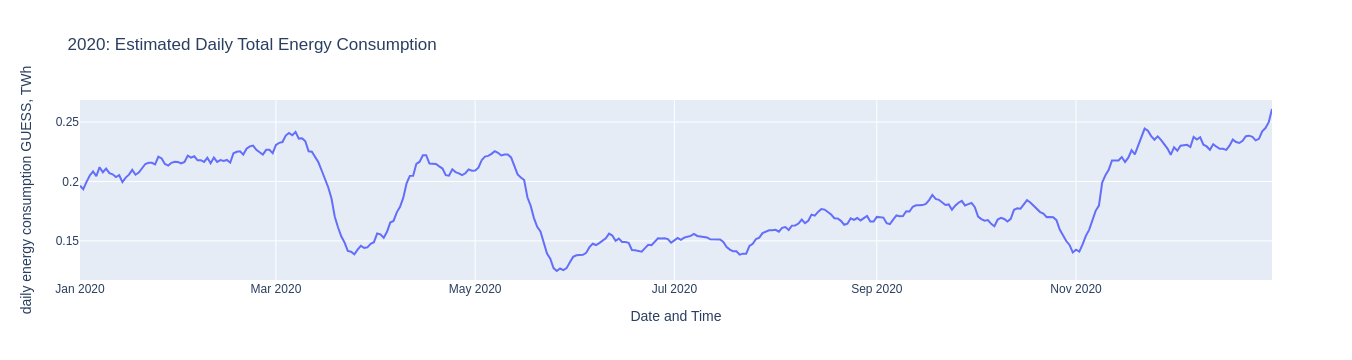

In [7]:
# I want to plot the total monthly energy estimates across each year 2020, 2021, 2022
# I also want to plot the annualized estimated daily across the same years and
# I want to plot the total daily energy estimates across the same years
import plotly.express as px

all_days_2020_df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec], axis=0)

fig = px.line(all_days_2020_df, x="Date and Time", y="daily energy consumption GUESS, TWh", title='2020: Estimated Daily Total Energy Consumption')
fig.show()

In [8]:
monthly_consumption_2020 = [sum(jan['daily energy consumption GUESS, TWh']), sum(feb['daily energy consumption GUESS, TWh']), 
                            sum(mar['daily energy consumption GUESS, TWh']), sum(apr['daily energy consumption GUESS, TWh']), 
                            sum(may['daily energy consumption GUESS, TWh']), sum(jun['daily energy consumption GUESS, TWh']), 
                            sum(jul['daily energy consumption GUESS, TWh']), sum(aug['daily energy consumption GUESS, TWh']), 
                            sum(sep['daily energy consumption GUESS, TWh']), sum(oco['daily energy consumption GUESS, TWh']), 
                            sum(nov['daily energy consumption GUESS, TWh']), sum(dec['daily energy consumption GUESS, TWh'])]
annual_consumption_2020 = total_annual_estimate(jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec)
annual_consumption_2020

68.7201975647

In [9]:
# months for the year 2021
jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec = total_monthly_estimates(cbeci_data_df.iloc[366:731], 0) # 366-731 captures 2021
monthly_consumption_2021 = [sum(jan['daily energy consumption GUESS, TWh']), sum(feb['daily energy consumption GUESS, TWh']), 
                            sum(mar['daily energy consumption GUESS, TWh']), sum(apr['daily energy consumption GUESS, TWh']), 
                            sum(may['daily energy consumption GUESS, TWh']), sum(jun['daily energy consumption GUESS, TWh']), 
                            sum(jul['daily energy consumption GUESS, TWh']), sum(aug['daily energy consumption GUESS, TWh']), 
                            sum(sep['daily energy consumption GUESS, TWh']), sum(oco['daily energy consumption GUESS, TWh']), 
                            sum(nov['daily energy consumption GUESS, TWh']), sum(dec['daily energy consumption GUESS, TWh'])]
annual_consumption_2021 = total_annual_estimate(jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec)
annual_consumption_2021

104.03992440990001

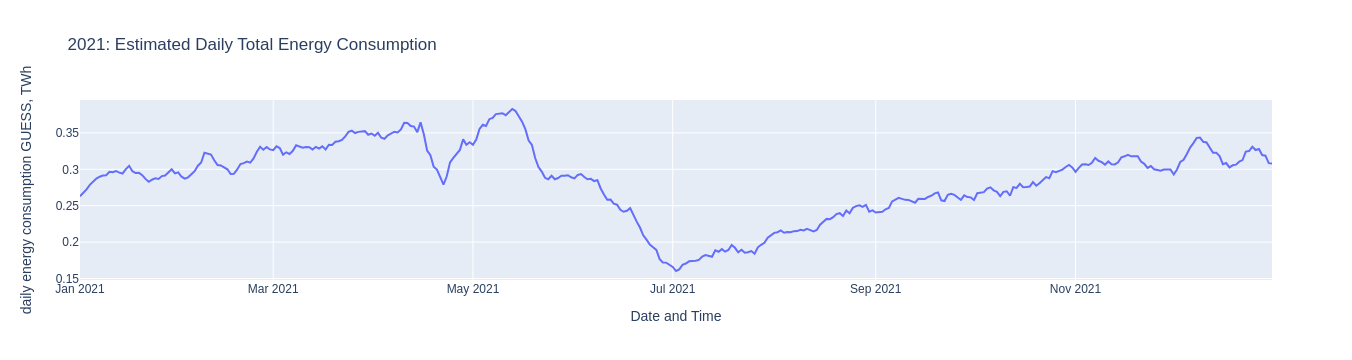

In [10]:
all_days_2021_df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec], axis=0)

fig = px.line(all_days_2021_df, x="Date and Time", y="daily energy consumption GUESS, TWh", title='2021: Estimated Daily Total Energy Consumption')
fig.show()

In [11]:
annual_consumption_2020 + annual_consumption_2021

172.7601219746

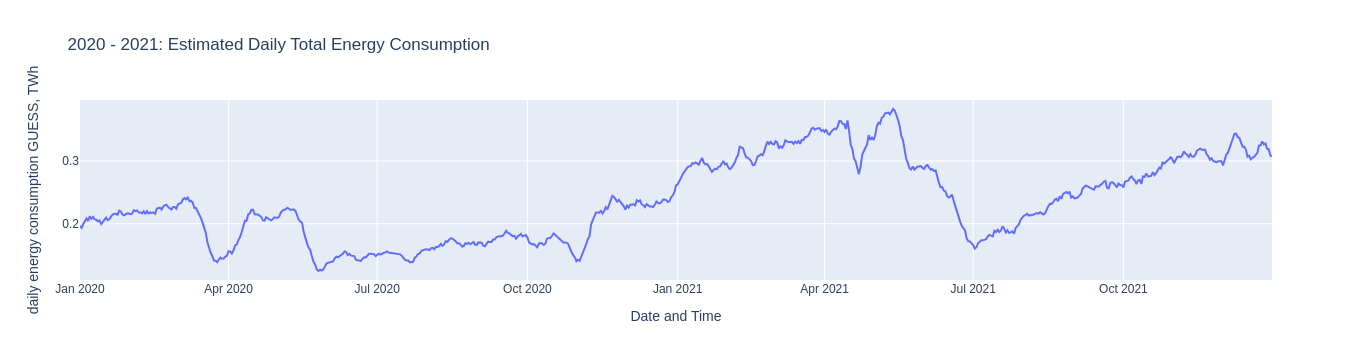

In [12]:
all_days_2020_2021_df = pd.concat([all_days_2020_df, all_days_2021_df], axis=0)
fig = px.line(all_days_2020_2021_df, x="Date and Time", y="daily energy consumption GUESS, TWh", title='2020 - 2021: Estimated Daily Total Energy Consumption')
fig.show()

In [13]:
# months for the year 2022
cbeci_data_df = daily_22_df
daily_22_df
jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec = total_monthly_estimates(cbeci_data_df, 0)
monthly_consumption_2022 = [sum(jan['daily energy consumption GUESS, TWh']), sum(feb['daily energy consumption GUESS, TWh']), 
                            sum(mar['daily energy consumption GUESS, TWh']), sum(apr['daily energy consumption GUESS, TWh']), 
                            sum(may['daily energy consumption GUESS, TWh']), sum(jun['daily energy consumption GUESS, TWh']), 
                            sum(jul['daily energy consumption GUESS, TWh']), sum(aug['daily energy consumption GUESS, TWh']), 
                            sum(sep['daily energy consumption GUESS, TWh']), sum(oco['daily energy consumption GUESS, TWh']), 
                            sum(nov['daily energy consumption GUESS, TWh']), sum(dec['daily energy consumption GUESS, TWh'])]
annual_consumption_2022 = total_annual_estimate(jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec)
annual_consumption_2022

105.2876596984

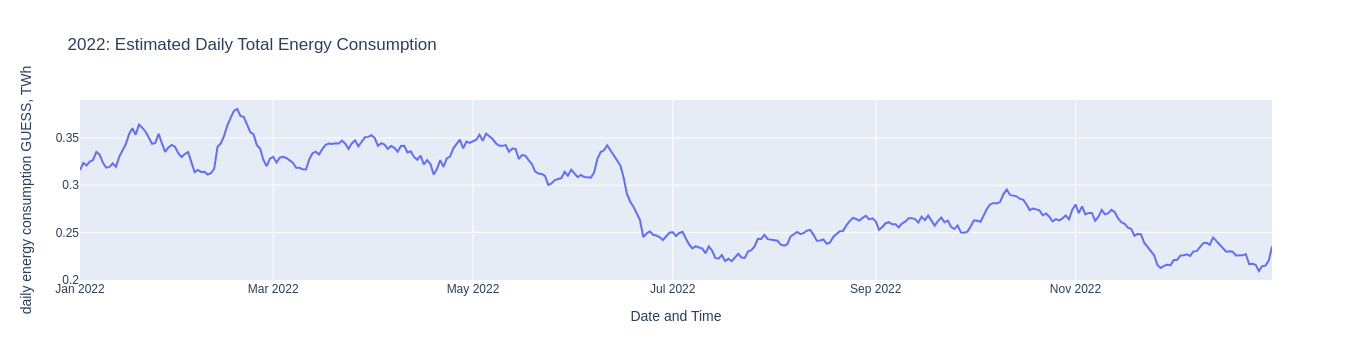

In [14]:
all_days_2022_df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec], axis=0)
fig = px.line(all_days_2022_df, x="Date and Time", y="daily energy consumption GUESS, TWh", title='2022: Estimated Daily Total Energy Consumption')
fig.show()

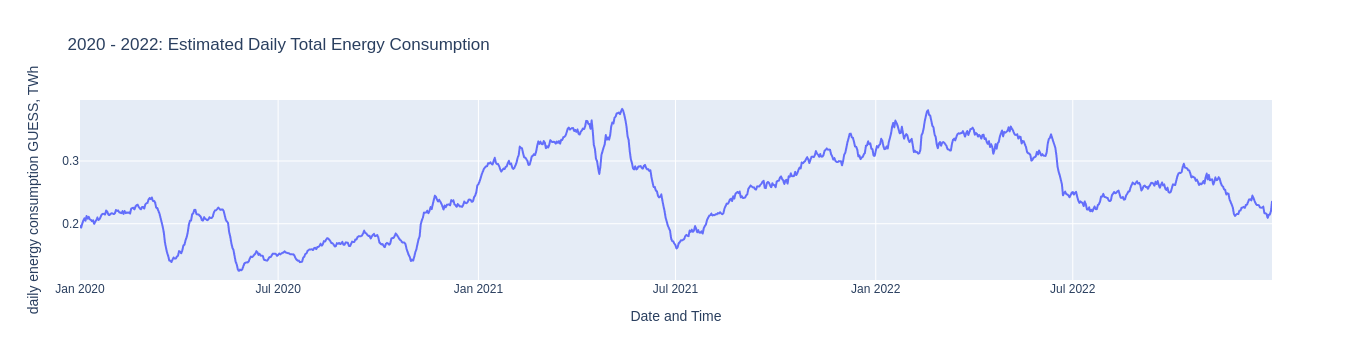

In [15]:
all_days_2020_2021_2022_df = pd.concat([all_days_2020_df, all_days_2021_df, all_days_2022_df], axis=0)
fig = px.line(all_days_2020_2021_2022_df, x="Date and Time", y="daily energy consumption GUESS, TWh", title='2020 - 2022: Estimated Daily Total Energy Consumption')
fig.show()

In [16]:
# let's compare with hashrate over the same period, TH/s
blockchain_hashrate_df = pd.read_csv('~/Documents/Bitcoin Research/blockchain.com data/Blockchain.com Daily Hashrate 2020-2022.csv')
blockchain_hashrate_df

date      hashrate
0     2020-01-01 0:00:00  1.127185e+08
1     2020-01-02 0:00:00  9.671772e+07
2     2020-01-03 0:00:00  1.159241e+08
3     2020-01-04 0:00:00  1.152381e+08
4     2020-01-05 0:00:00  1.118084e+08
...                  ...           ...
1091  2022-12-27 0:00:00  2.021651e+08
1092  2022-12-28 0:00:00  2.953368e+08
1093  2022-12-29 0:00:00  2.478720e+08
1094  2022-12-30 0:00:00  2.777572e+08
1095  2022-12-31 0:00:00  2.742413e+08

[1096 rows x 2 columns]

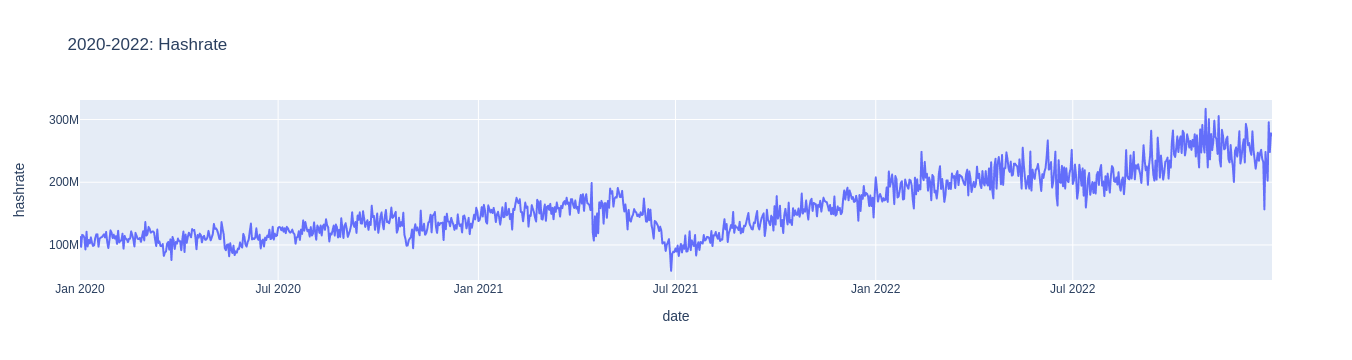

In [17]:
fig = px.line(blockchain_hashrate_df, x="date", y="hashrate", title='2020-2022: Hashrate')
fig.show()

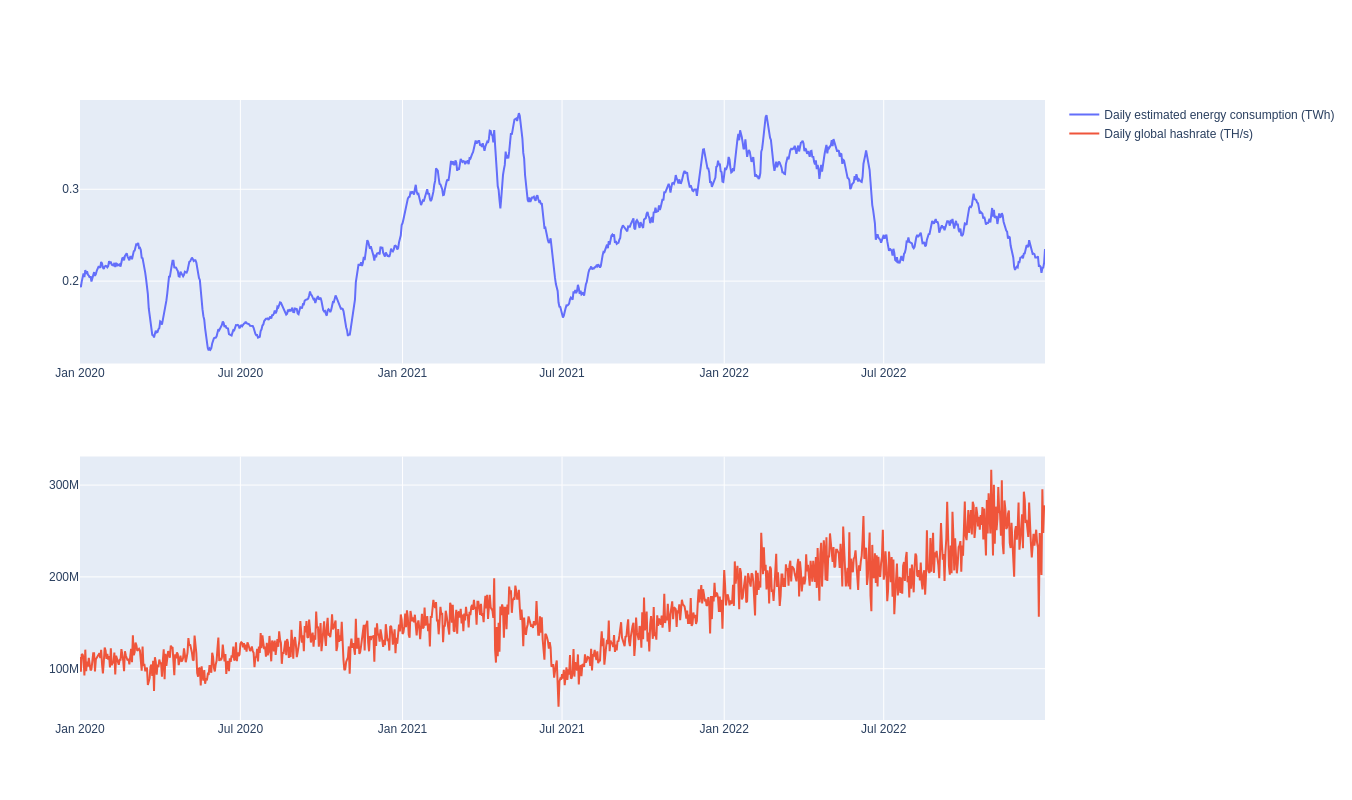

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Scatter(x=all_days_2020_2021_2022_df['Date and Time'], y=all_days_2020_2021_2022_df['daily energy consumption GUESS, TWh'], name="Daily estimated energy consumption (TWh)"),
    row=1, col=1
)

fig.update_yaxes(dtick=0.1)

fig.add_trace(
    go.Scatter(x=blockchain_hashrate_df['date'], y=blockchain_hashrate_df['hashrate'], name="Daily global hashrate (TH/s)"),
    row=2, col=1
)
fig.update_layout(yaxis=dict(tickvals=[0, 0.1, 0.2, 0.3]),
                 yaxis2=dict(tickvals=[0, 100000000, 200000000, 300000000]))
fig.update_layout(height=800)
fig.show()

In [19]:
# months for the year 2023
cbeci_data_df = daily_23_df
daily_23_df
jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec = total_monthly_estimates(cbeci_data_df, 0)
monthly_consumption_2023 = [sum(jan['daily energy consumption GUESS, TWh']), sum(feb['daily energy consumption GUESS, TWh']), 
                            sum(mar['daily energy consumption GUESS, TWh']), sum(apr['daily energy consumption GUESS, TWh']), 
                            sum(may['daily energy consumption GUESS, TWh']), sum(jun['daily energy consumption GUESS, TWh']), 
                            sum(jul['daily energy consumption GUESS, TWh']), sum(aug['daily energy consumption GUESS, TWh']), 
                            sum(sep['daily energy consumption GUESS, TWh']), sum(oco['daily energy consumption GUESS, TWh']), 
                            sum(nov['daily energy consumption GUESS, TWh']), sum(dec['daily energy consumption GUESS, TWh'])]
annual_consumption_2023 = total_annual_estimate(jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec)
annual_consumption_2023

81.57806171290001

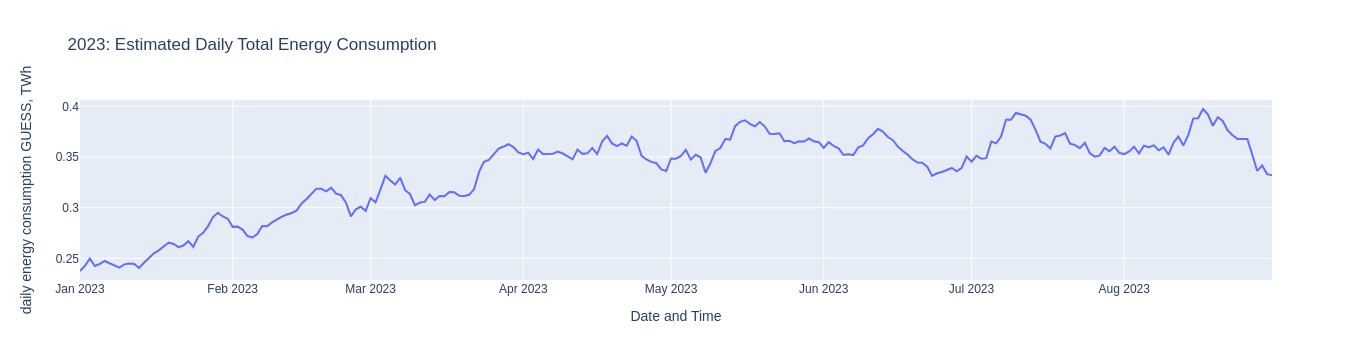

In [20]:
all_days_2023_df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec], axis=0)
fig = px.line(all_days_2023_df, x="Date and Time", y="daily energy consumption GUESS, TWh", title='2023: Estimated Daily Total Energy Consumption')
fig.show()

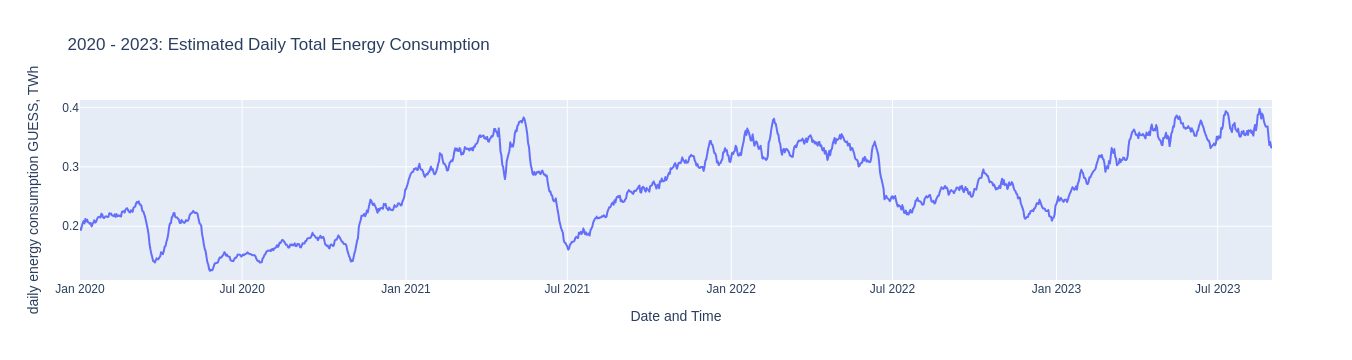

In [21]:
all_days_2020_2021_2022_2023_df = pd.concat([all_days_2020_df, all_days_2021_df, all_days_2022_df, all_days_2023_df], axis=0)
fig = px.line(all_days_2020_2021_2022_2023_df, x="Date and Time", y="daily energy consumption GUESS, TWh", title='2020 - 2023: Estimated Daily Total Energy Consumption')
fig.show()

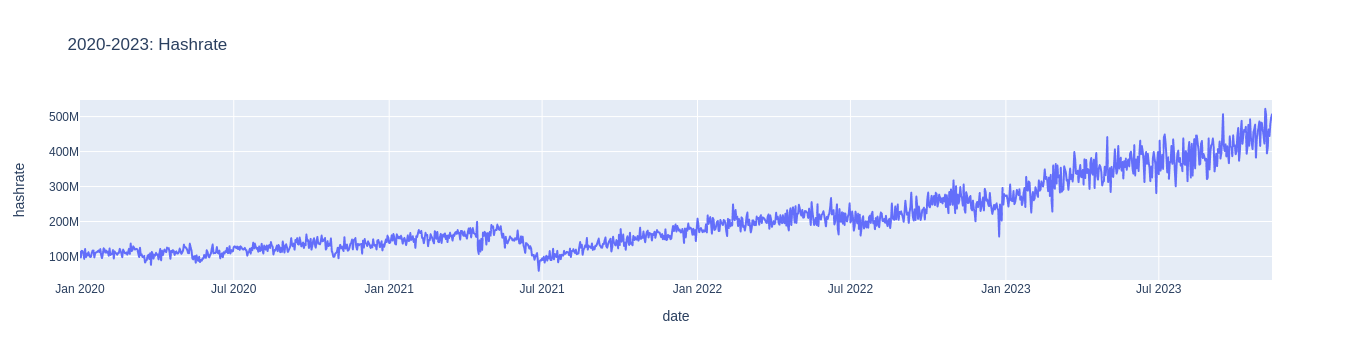

In [22]:
# let's compare with hashrate over the same period, TH/s
blockchain_hashrate_2023_df = pd.read_csv('~/Documents/Bitcoin Research/blockchain.com data/Blockchain.com Daily Hashrate 2023.csv')
blockchain_hashrate_all_df = pd.concat([blockchain_hashrate_df, blockchain_hashrate_2023_df], axis=0)
fig = px.line(blockchain_hashrate_all_df, x="date", y="hashrate", title='2020-2023: Hashrate')
fig.show()

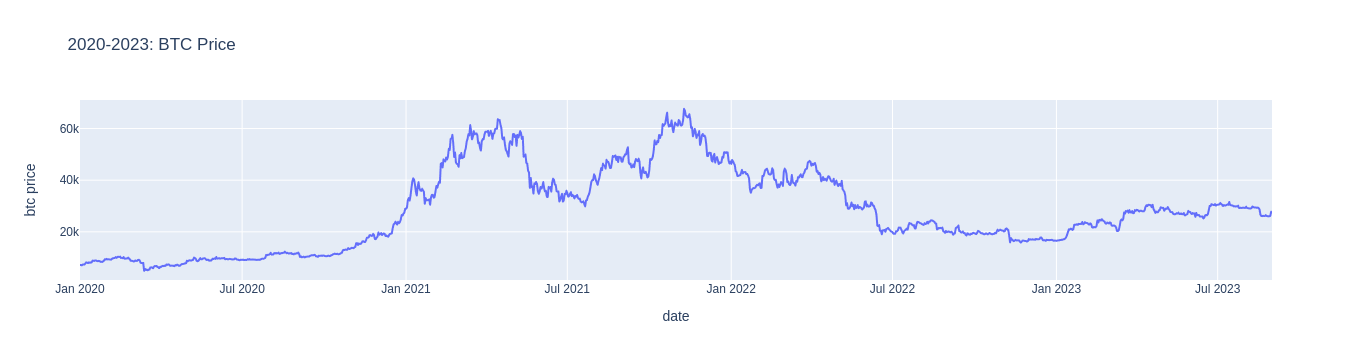

In [23]:
# bring in bitcoin price data
btc_price_2020_to_2023_df = pd.read_csv('~/Documents/Bitcoin Research/blockchain.com data/Blockhain.com Daily BTC Price 2020-2023 Incomplete.csv')
fig = px.line(btc_price_2020_to_2023_df, x="date", y="btc price", title='2020-2023: BTC Price')
fig.show()

In [24]:
hashprice_df = pd.read_csv('~/Documents/Bitcoin Research/hasrate index/hashrateindex-hashprice-20231114.csv')
hashprice_df.iloc[76] #aug 30 2023
hashprice_df.iloc[1413] # jan 1 2020

timestamp        2020-01-01T00:00:00+00:00
usd_hashprice                      0.13989
btc_hashprice                     0.000019
Name: 1413, dtype: object

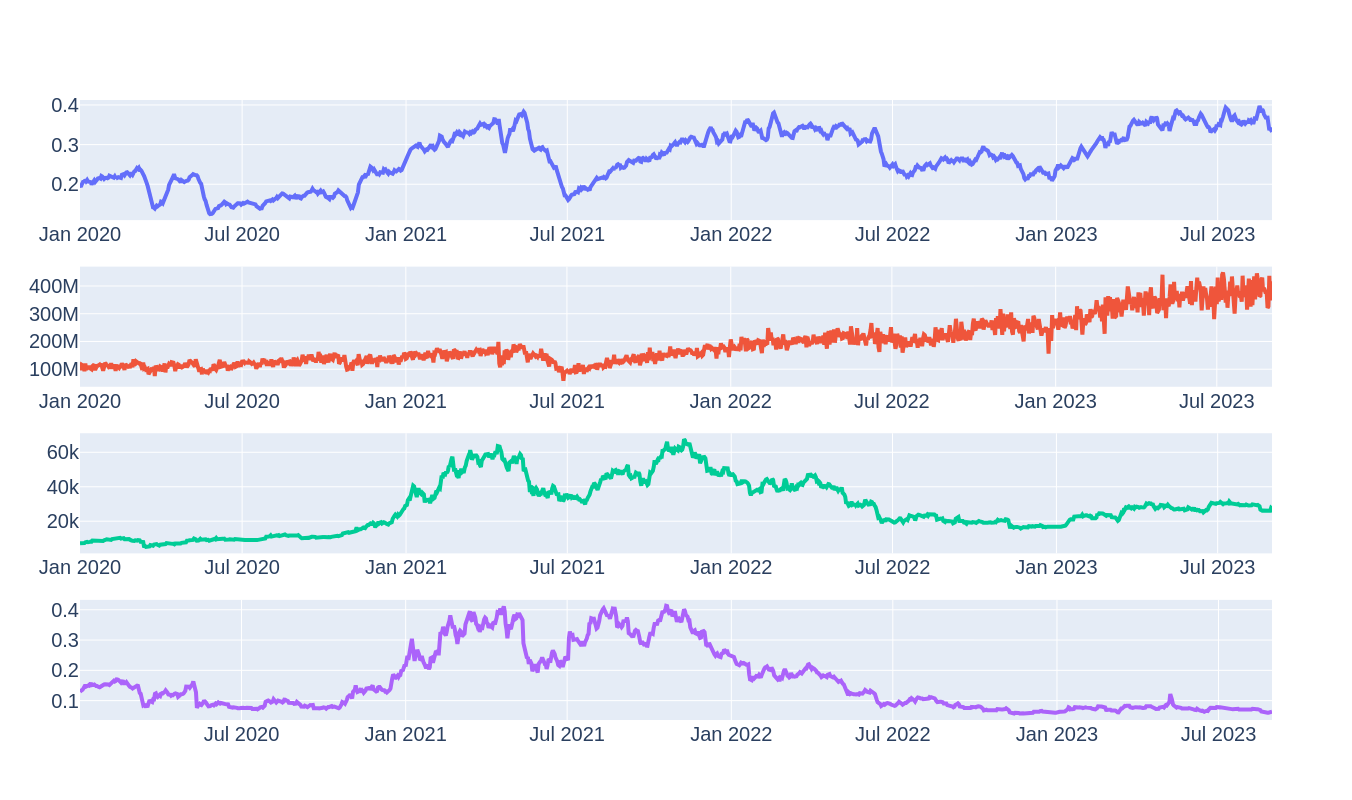

In [126]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(
    go.Scatter(x=all_days_2020_2021_2022_2023_df['Date and Time'], y=all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'], name="Daily estimated energy consumption (TWh)", line=dict(width=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=blockchain_hashrate_all_df['date'], y=blockchain_hashrate_all_df['hashrate'][:-72], name="Daily global hashrate (TH/s)", line=dict(width=4)),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=btc_price_2020_to_2023_df['date'], y=btc_price_2020_to_2023_df['btc price'], name="BTC/USD Price", line=dict(width=4)),
    row=3, col=1
) 

fig.add_trace(
    go.Scatter(x=hashprice_df['timestamp'][76:1413], y=hashprice_df['usd_hashprice'][76:1413], name="Hash Price", line=dict(width=4)),
    row=4, col=1
)

fig.update_layout(height=800)
fig.update_layout(showlegend=False)
fig.update_layout(
    font=dict(
        size=20,  # Set the font size here
    )
)

fig.show()

In [206]:
all_days_2020_2021_2022_2023_df = all_days_2020_2021_2022_2023_df.reset_index(drop=True)
blockchain_hashrate_all_df = blockchain_hashrate_all_df.reset_index(drop=True)
print(btc_price_2020_to_2023_df['date'][0])
print(btc_price_2020_to_2023_df['btc price'][0])
print(all_days_2020_2021_2022_2023_df['Date and Time'][0])
print(all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][0])
print(blockchain_hashrate_all_df['date'][0])
print(blockchain_hashrate_all_df['hashrate'][0])
print(btc_price_2020_to_2023_df['date'][730])
print(btc_price_2020_to_2023_df['btc price'][730])
print(all_days_2020_2021_2022_2023_df['Date and Time'][730])
print(all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][730])
print(blockchain_hashrate_all_df['date'][730])
print(blockchain_hashrate_all_df['hashrate'][730])
print("\n")
print((all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][730]-all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][0])/all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][0]*100)
print((blockchain_hashrate_all_df['hashrate'][730]-blockchain_hashrate_all_df['hashrate'][0])/blockchain_hashrate_all_df['hashrate'][0]*100)
print((btc_price_2020_to_2023_df['btc price'][730]-btc_price_2020_to_2023_df['btc price'][0])/btc_price_2020_to_2023_df['btc price'][0]*100)


2020-01-01 0:00:00
7168.31
2020-01-01 0:00:00
0.1964595984
2020-01-01 0:00:00
112718458.5
2021-12-31 0:00:00
47132.96
2021-12-31 0:00:00
0.3079937957
2021-12-31 0:00:00
179781041.0


56.77207843666244
59.49565261309886
557.5184387951972


In [217]:
import numpy as np
X = np.array([all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][0:730], btc_price_2020_to_2023_df['btc price'][0:730]])
print(np.corrcoef(X))
X = np.array([all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][731:1337], btc_price_2020_to_2023_df['btc price'][731:1337]])
print(np.corrcoef(X))

[[1.        0.8312905]
 [0.8312905 1.       ]]
[[1.         0.66293264]
 [0.66293264 1.        ]]


In [201]:
all_days_2020_2021_2022_2023_df = all_days_2020_2021_2022_2023_df.reset_index(drop=True)
blockchain_hashrate_all_df = blockchain_hashrate_all_df.reset_index(drop=True)
print(btc_price_2020_to_2023_df['date'][731])
print(btc_price_2020_to_2023_df['btc price'][731])
print(all_days_2020_2021_2022_2023_df['Date and Time'][731])
print(all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][731])
print(blockchain_hashrate_all_df['date'][731])
print(blockchain_hashrate_all_df['hashrate'][731])
print(btc_price_2020_to_2023_df['date'][1337])
print(btc_price_2020_to_2023_df['btc price'][1337])
print(all_days_2020_2021_2022_2023_df['Date and Time'][1337])
print(all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][1337])
print(blockchain_hashrate_all_df['date'][1337])
print(blockchain_hashrate_all_df['hashrate'][1337])
print("\n")
print((all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][1337]-all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][731])/all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][731]*100)
print((blockchain_hashrate_all_df['hashrate'][1337]-blockchain_hashrate_all_df['hashrate'][731])/blockchain_hashrate_all_df['hashrate'][731]*100)
print((btc_price_2020_to_2023_df['btc price'][1337]-btc_price_2020_to_2023_df['btc price'][731])/btc_price_2020_to_2023_df['btc price'][731]*100)

2022-01-01 0:00:00
46249.56
2022-01-01 0:00:00
0.3159362122
2022-01-01 0:00:00
207532476.9
2023-08-30 0:00:00
27731.23
2023-08-30 0:00:00
0.3330993794
2023-08-30 0:00:00
348384580.2


5.4324786261395825
67.86990903976435
-40.04001335364055


In [193]:
btc_price_2020_to_2023_df['btc price']

0        7168.31
1        7175.68
2        6944.33
3        7326.35
4        7347.89
          ...   
1334    26006.44
1335    26088.78
1336    26108.31
1337    27731.23
1338    27301.12
Name: btc price, Length: 1339, dtype: float64

In [198]:
all_days_2020_2021_2022_2023_df = all_days_2020_2021_2022_2023_df.reset_index(drop=True)
blockchain_hashrate_all_df = blockchain_hashrate_all_df.reset_index(drop=True)
print(btc_price_2020_to_2023_df['date'][0])
print(btc_price_2020_to_2023_df['btc price'][0])
print(all_days_2020_2021_2022_2023_df['Date and Time'][0])
print(all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][0])
print(blockchain_hashrate_all_df['date'][0])
print(blockchain_hashrate_all_df['hashrate'][0])
print(btc_price_2020_to_2023_df['date'][1337])
print(btc_price_2020_to_2023_df['btc price'][1337])
print(all_days_2020_2021_2022_2023_df['Date and Time'][1337])
print(all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][1337])
print(blockchain_hashrate_all_df['date'][1337])
print(blockchain_hashrate_all_df['hashrate'][1337])
print("\n")
print((all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][1337]-all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][0])/all_days_2020_2021_2022_2023_df['daily energy consumption GUESS, TWh'][0]*100)
print((blockchain_hashrate_all_df['hashrate'][1337]-blockchain_hashrate_all_df['hashrate'][0])/blockchain_hashrate_all_df['hashrate'][0]*100)
print((btc_price_2020_to_2023_df['btc price'][1337]-btc_price_2020_to_2023_df['btc price'][0])/btc_price_2020_to_2023_df['btc price'][0]*100)

2020-01-01 0:00:00
7168.31
2020-01-01 0:00:00
0.1964595984
2020-01-01 0:00:00
112718458.5
2023-08-30 0:00:00
27731.23
2023-08-30 0:00:00
0.3330993794
2023-08-30 0:00:00
348384580.2


69.55108435160072
209.07500407309067
286.85868775206427


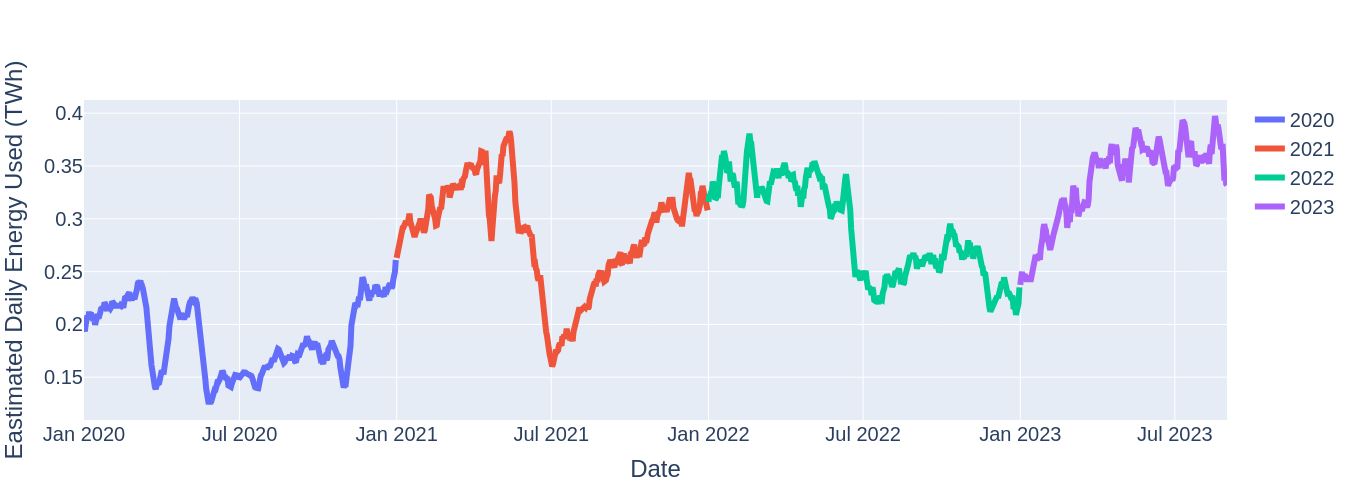

In [130]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Scatter(x=all_days_2020_df['Date and Time'], y=all_days_2020_df['daily energy consumption GUESS, TWh'], name="2020", line=dict(width=6)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=all_days_2021_df['Date and Time'], y=all_days_2021_df['daily energy consumption GUESS, TWh'], name="2021", line=dict(width=6)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=all_days_2022_df['Date and Time'], y=all_days_2022_df['daily energy consumption GUESS, TWh'], name="2022", line=dict(width=6)),
    row=1, col=1
) 

fig.add_trace(
    go.Scatter(x=all_days_2023_df['Date and Time'], y=all_days_2023_df['daily energy consumption GUESS, TWh'], name="2023", line=dict(width=6)),
    row=1, col=1
) 

fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Eastimated Daily Energy Used (TWh)", row=1, col=1)
fig.update_layout(height=500)
fig.update_layout(
    font=dict(
        size=20,  # Set the font size here
    )
)
fig.show()

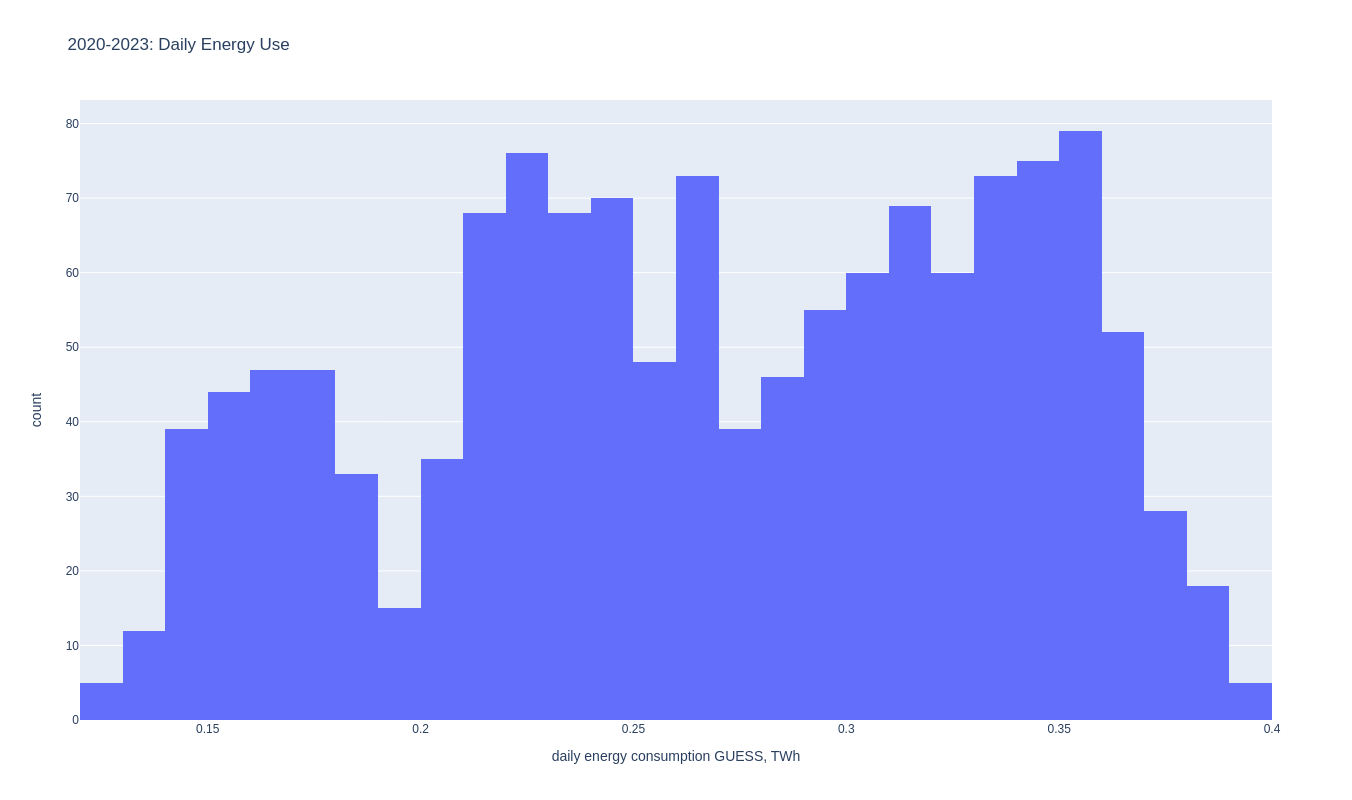

In [32]:
fig = px.histogram(all_days_2020_2021_2022_2023_df, x="daily energy consumption GUESS, TWh",title='2020-2023: Daily Energy Use')
# y="daily energy consumption GUESS, TWh", 
fig.update_layout(height=800)
fig.show()

In [33]:
# we now have the ability to compute the total monthly and total yearly energy consumption values for bitcoin mining.
# we also verified that the above algos correctly compute these values by using the latest CBECI data and comparing 
# to data on their website (data downloaded 10/31/23 and compared on 11/1/23.

# the next step is to import the geographic data for 2020-2021. as far as I know, what is available on CBECI did not 
# change significantly after the Aug '23 update. So we assume that these data are the same used in Shamanana et al. (2023).

# Top 10 countries according to CBECI
# Mainland China
# Russian Federation
# Other
# Malaysia
# Kazakhstan
# United States
# Iran, Islamic Rep.
# Canada
# Germany *
# Ireland *

# First, I want to plot how the share of each country listed changed over the two year period. Shamanana et al. do not 
# say how they determined the hashrate share in their environmental footprint calculations. I will go through and 
# compute the electricity use in TWh using every data point for each of the 10 countries in order to determine which 
# month and year they used for their analysis. In their figure they claim their footprints represent the entire 
# 2020-2021 period which is not possible unless they took an average, they do not claim to do this.

geo_distrib_df = pd.read_csv('Geographic Distribution 2020-2021.csv')
geo_distrib_df

date             country monthly_hashrate_%  \
0    2020-01-01      Mainland China             72.69%   
1    2020-01-01  Russian Federation              6.05%   
2    2020-01-01               Other              5.56%   
3    2020-01-01            Malaysia              4.13%   
4    2020-01-01          Kazakhstan              3.49%   
..          ...                 ...                ...   
235  2021-12-01  Russian Federation              4.72%   
236  2021-12-01           Germany *              3.06%   
237  2021-12-01            Malaysia              2.84%   
238  2021-12-01           Ireland *              2.06%   
239  2021-12-01  Iran, Islamic Rep.              0.23%   

     monthly_absolute_hashrate_EH/S  
0                             79.41  
1                              6.60  
2                              6.08  
3                              4.52  
4                              3.81  
..                              ...  
235                            8.18  
236                            5.31  
237                            4.93  
238                            3.56  
239                            0.40  

[240 rows x 4 columns]

In [34]:
# monthly_hashrate_% is a string, need to convert to a float for plotting
def percent_to_float(string):
    # converts percent string to a float
    cleaned_str = string.replace('%', '')
    
    return float(cleaned_str)

geo_distrib_df['monthly_hashrate_%']= geo_distrib_df['monthly_hashrate_%'].apply(percent_to_float)
geo_distrib_df

date             country  monthly_hashrate_%  \
0    2020-01-01      Mainland China               72.69   
1    2020-01-01  Russian Federation                6.05   
2    2020-01-01               Other                5.56   
3    2020-01-01            Malaysia                4.13   
4    2020-01-01          Kazakhstan                3.49   
..          ...                 ...                 ...   
235  2021-12-01  Russian Federation                4.72   
236  2021-12-01           Germany *                3.06   
237  2021-12-01            Malaysia                2.84   
238  2021-12-01           Ireland *                2.06   
239  2021-12-01  Iran, Islamic Rep.                0.23   

     monthly_absolute_hashrate_EH/S  
0                             79.41  
1                              6.60  
2                              6.08  
3                              4.52  
4                              3.81  
..                              ...  
235                            8.18  
236                            5.31  
237                            4.93  
238                            3.56  
239                            0.40  

[240 rows x 4 columns]

In [35]:
#from plotly.offline import init_notebook_mode, iplot
#from plotly.graph_objs import *
# https://plotly.com/python/getting-started/
import plotly.express as px

def plot_line(df, country_name, axis_range=False):
    if axis_range == False:
        fig = px.line(df, x="date", y="monthly_hashrate_%", title=country_name+' Hashrate Share 2020-2021')
    else:
        fig = px.line(df, x="date", y="monthly_hashrate_%", title=country_name+' Hashrate Share 2020-2021', range_y=axis_range)
    fig.show()

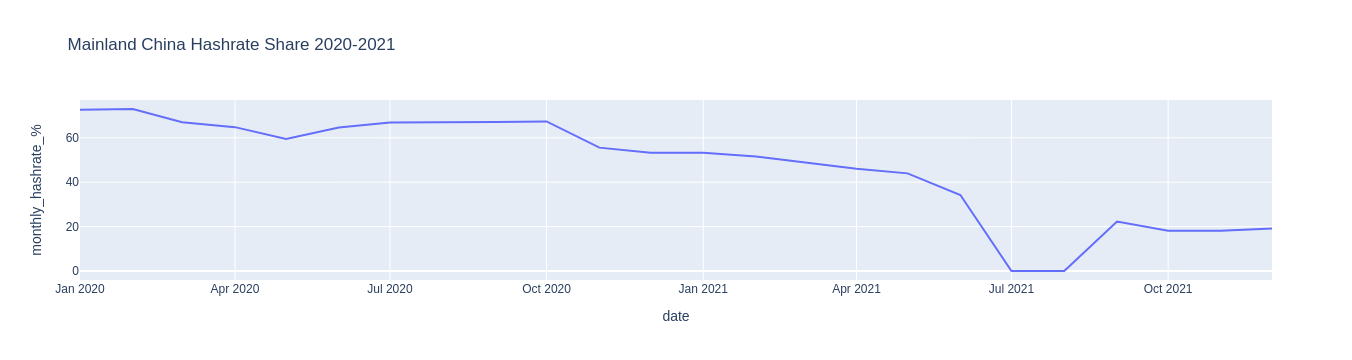

In [36]:
country_name = "Mainland China"
mainland_china_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
mainland_china_df = mainland_china_df.reset_index(drop=True)

plot_line(mainland_china_df, country_name)

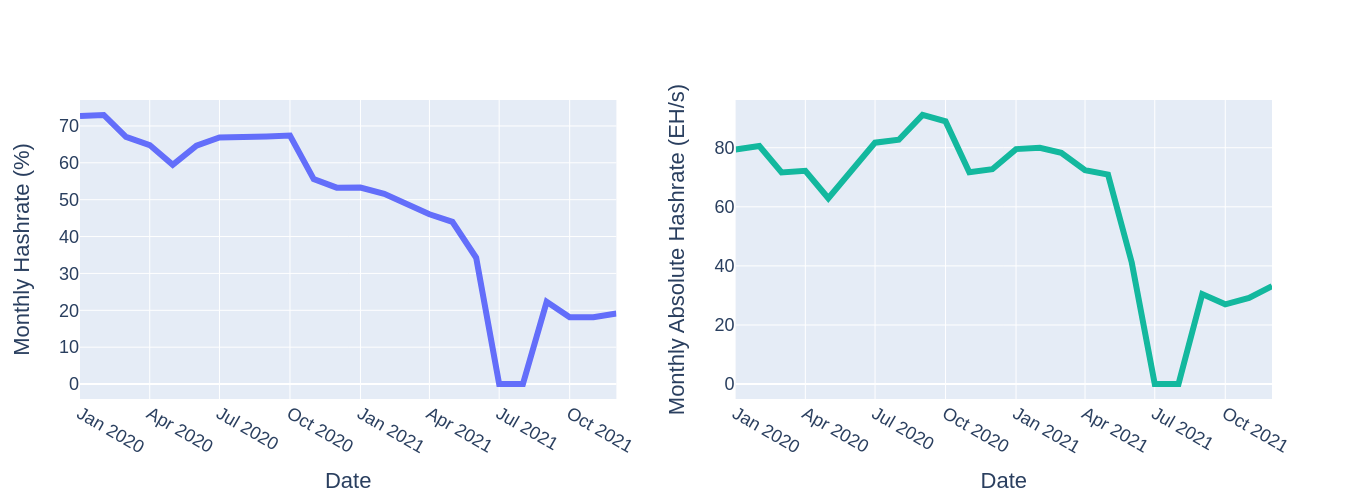

In [108]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_subplot(df, country_name, axis_range=0):
    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(
        go.Scatter(x=df['date'], y=df['monthly_hashrate_%'], name="Monthly Hashrate (%)", line=dict(width=6)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=df['date'], y=df['monthly_absolute_hashrate_EH/S'], name="Monthly Absolute Hashrate (EH/s)", line=dict(color='#13B89E', width=6)),
        row=1, col=2
    )
    
#     fig.add_trace(
#         go.Histogram(x=df['monthly_hashrate_%'], cumulative_enabled=False, nbinsx=6),
#         row=2, col=1
#     )
    
#     fig.add_trace(
#         go.Histogram(x=df['monthly_absolute_hashrate_EH/S'], nbinsx=6),
#         row=2, col=2
#     )

    fig.update_layout(height=500)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_yaxes(title_text="Monthly Hashrate (%)", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=2)
    fig.update_yaxes(title_text="Monthly Absolute Hashrate (EH/s)", row=1, col=2)
    fig.update_layout(showlegend=False)
    fig.update_layout(
    font=dict(
        size=18,  # Set the font size here
    )
)
    fig.show()

plot_subplot(mainland_china_df, country_name)

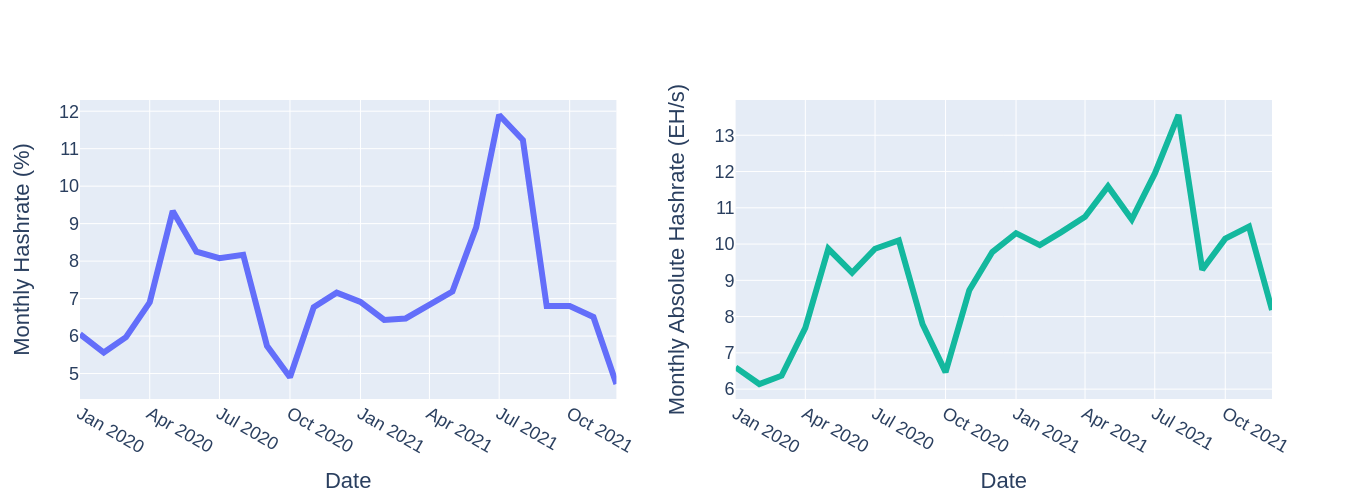

In [109]:
country_name = "Russian Federation"
russian_fed_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
russian_fed_df = russian_fed_df.reset_index(drop=True)

#plot_line(russian_fed_df, country_name, axis_range=[0,80])
plot_subplot(russian_fed_df, country_name)

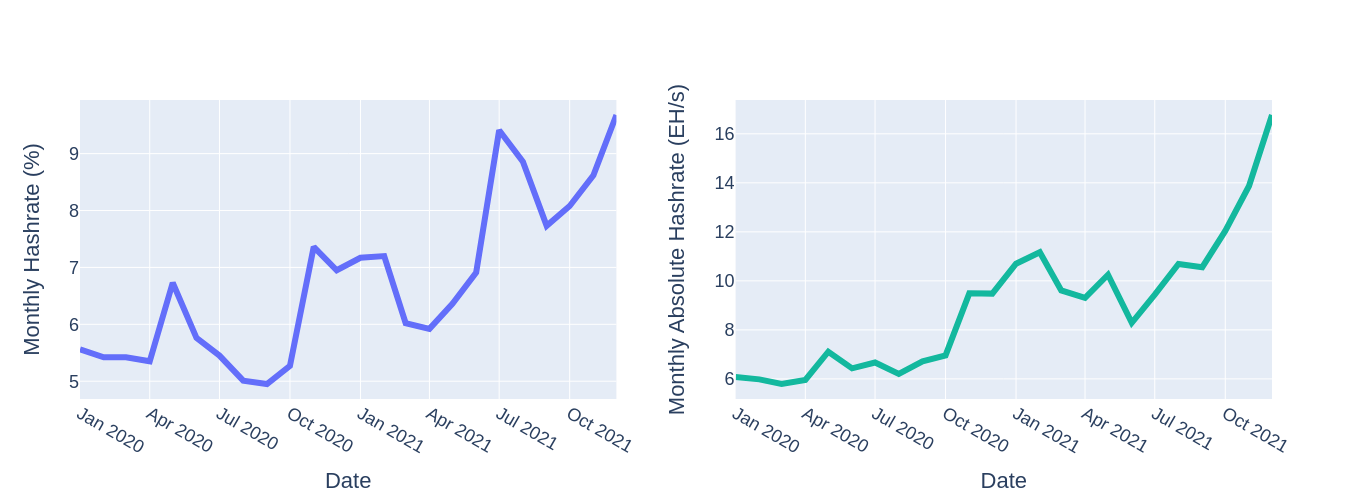

In [110]:
country_name = "Other"
other_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
other_df = other_df.reset_index(drop=True)

# plot_line(other_df, country_name, axis_range=[0,80])
plot_subplot(other_df, country_name, axis_range=[0,80])

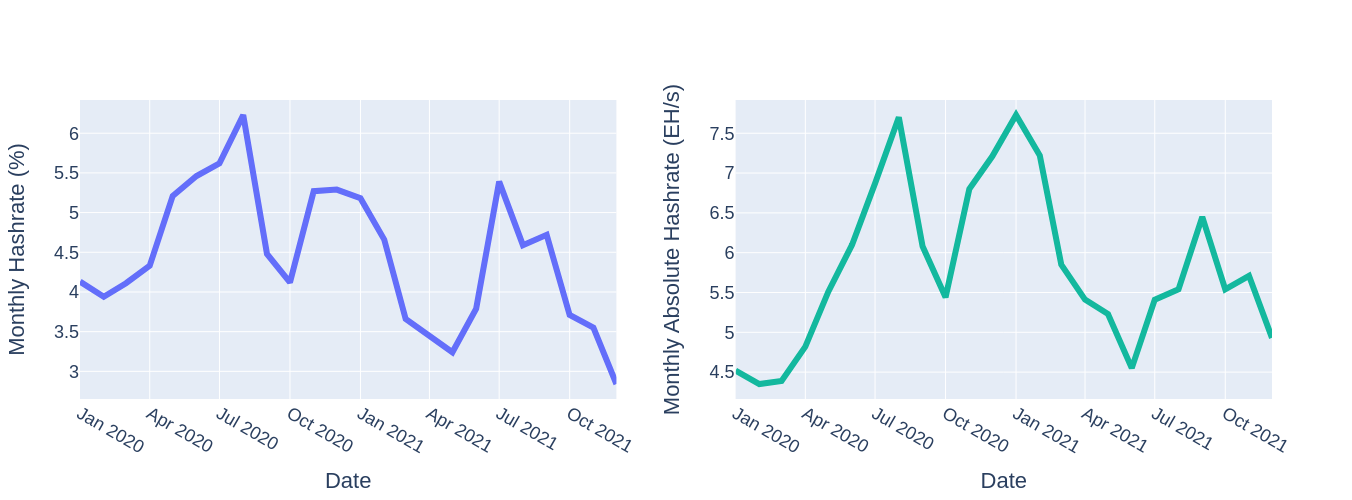

In [111]:
country_name = "Malaysia"
malaysia_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
malaysia_df = malaysia_df.reset_index(drop=True)

#plot_line(malaysia_df, country_name, axis_range=[0,80])
plot_subplot(malaysia_df, country_name, axis_range=[0,80])

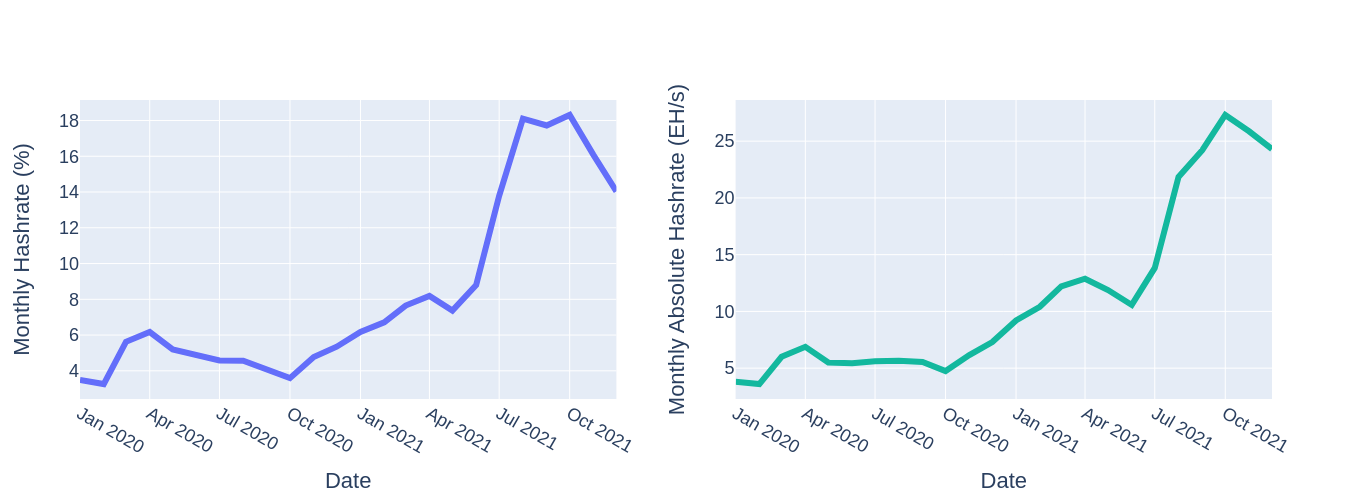

In [112]:
country_name = "Kazakhstan"
kazakhstan_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
kazakhstan_df = kazakhstan_df.reset_index(drop=True)

#plot_line(kazakhstan_df, country_name, axis_range=[0,80])
plot_subplot(kazakhstan_df, country_name, axis_range=[0,80])

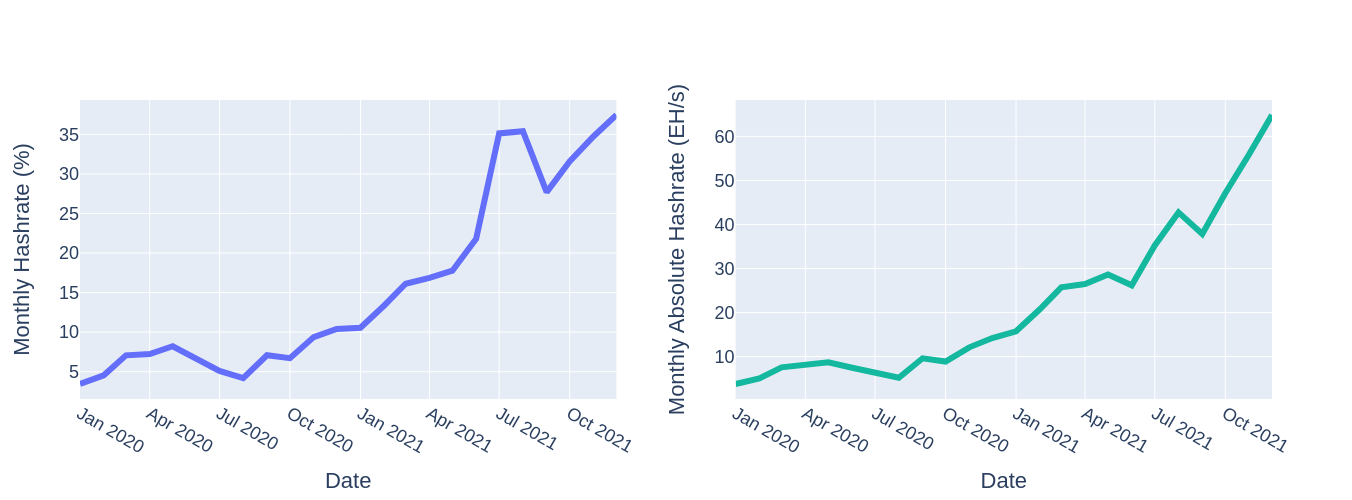

In [113]:
country_name = "United States"
us_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
us_df = us_df.reset_index(drop=True)

#plot_line(us_df, country_name, axis_range=[0,80])
plot_subplot(us_df, country_name, axis_range=[0,80])

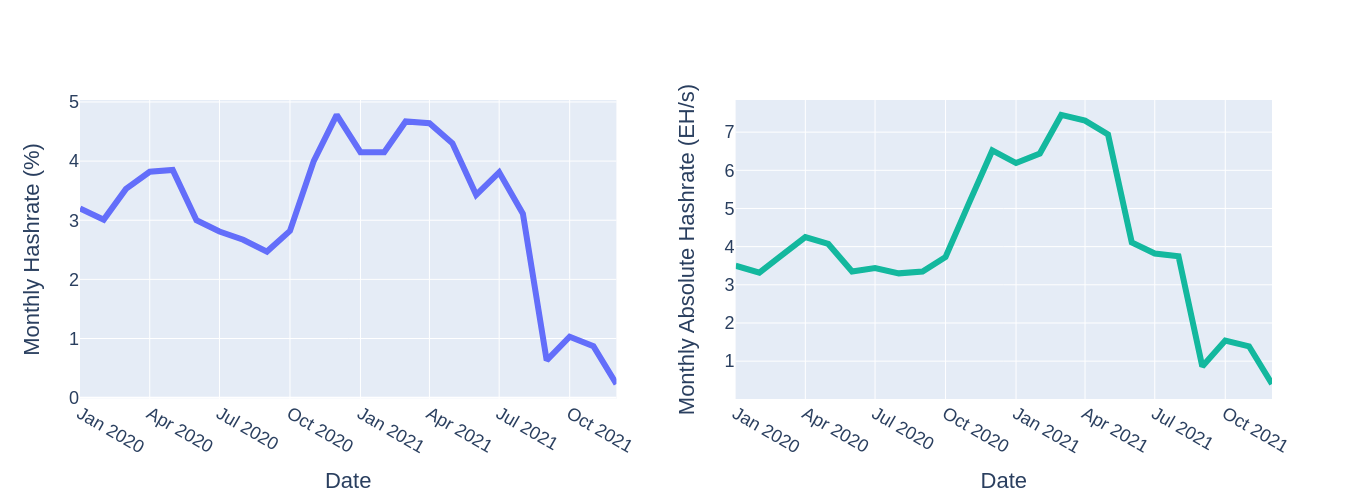

In [114]:
country_name = "Iran, Islamic Rep."
iran_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
iran_df = iran_df.reset_index(drop=True)

#plot_line(iran_df, country_name, axis_range=[0,80])
plot_subplot(iran_df, country_name, axis_range=[0,80])

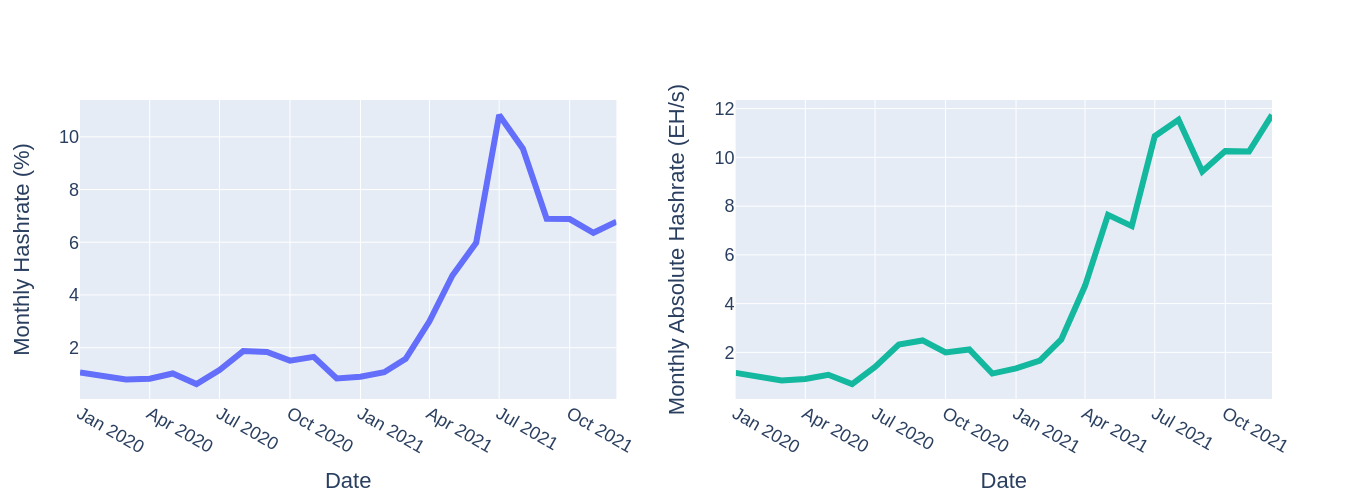

In [115]:
country_name = "Canada"
ca_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
ca_df = ca_df.reset_index(drop=True)

#plot_line(ca_df, country_name, axis_range=[0,80])
plot_subplot(ca_df, country_name, axis_range=[0,80])

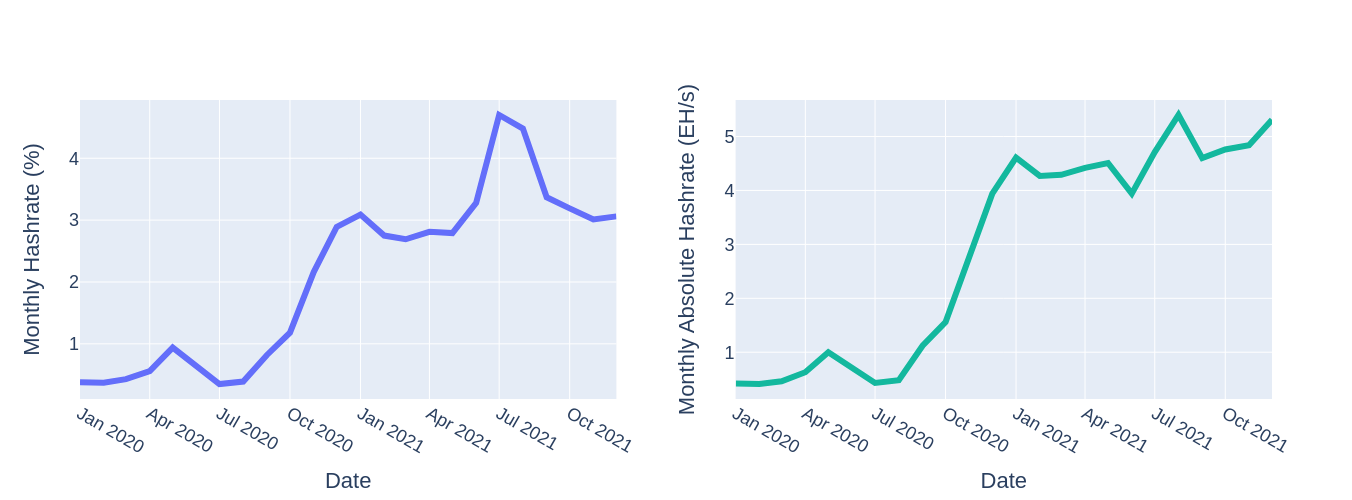

In [116]:
country_name = "Germany *"
germany_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
germany_df = germany_df.reset_index(drop=True)

#plot_line(germany_df, country_name, axis_range=[0,80])
plot_subplot(germany_df, country_name, axis_range=[0,80])

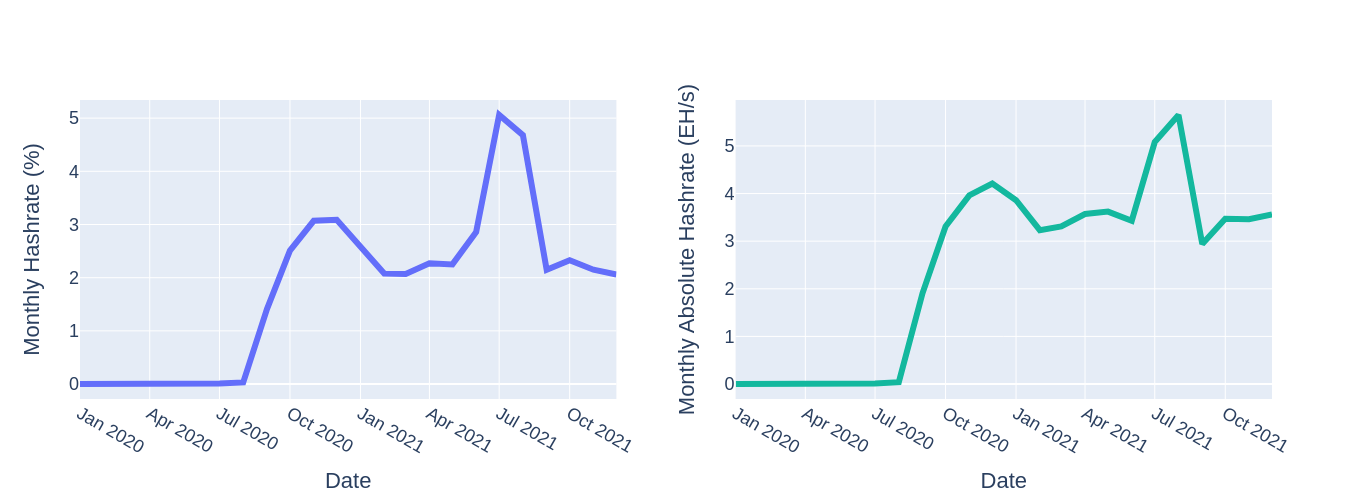

In [117]:
country_name = "Ireland *"
ireland_df = geo_distrib_df.loc[geo_distrib_df['country'] == country_name]
ireland_df = ireland_df.reset_index(drop=True)

#plot_line(ireland_df, country_name, axis_range=[0,80])
plot_subplot(ireland_df, country_name, axis_range=[0,80])

In [60]:
# now I will try to replicate Figure 1 results
from statistics import mean, median
annual_consumption_202021 = annual_consumption_2020 + annual_consumption_2021
annual_consumption_202021 # 156.14 TWh using v2 CBECI data

172.7601219746

In [61]:
mean(mainland_china_df['monthly_hashrate_%'])/100*annual_consumption_202021

81.6730674973337

In [62]:
mainland_china_df['monthly_hashrate_%']/100*annual_consumption_202021

0     125.579333
1     126.080337
2     115.852938
3     111.965835
4     102.757721
5     111.723971
6     115.507418
7     115.507418
8     115.956594
9     116.405770
10     96.020076
11     92.029317
12     92.081145
13     89.109671
14     84.756116
15     79.538760
16     75.979902
17     59.170342
18      0.000000
19      0.000000
20     38.508231
21     31.252306
22     31.304134
23     33.066287
Name: monthly_hashrate_%, dtype: float64

In [63]:
mean(russian_fed_df['monthly_hashrate_%'])/100*annual_consumption_202021

12.495595655654506

In [64]:
russian_fed_df['monthly_hashrate_%']/100*annual_consumption_202021

0     10.451987
1      9.605463
2     10.313779
3     11.920448
4     16.135795
5     14.252710
6     13.959018
7     14.114502
8      9.916431
9      8.465246
10    11.695860
11    12.369625
12    11.937724
13    11.108476
14    11.177580
15    11.816792
16    12.421453
17    15.375651
18    20.558455
19    19.400962
20    11.747688
21    11.747688
22    11.246684
23     8.154278
Name: monthly_hashrate_%, dtype: float64

In [65]:
mean(other_df['monthly_hashrate_%']/100*annual_consumption_202021)

11.603001692119072

In [66]:
other_df['monthly_hashrate_%']/100*annual_consumption_202021

0      9.605463
1      9.363599
2      9.363599
3      9.242667
4     11.626756
5      9.950983
6      9.415427
7      8.655282
8      8.551626
9      9.104458
10    12.715145
11    12.006828
12    12.386901
13    12.438729
14    10.400159
15    10.227399
16    10.987544
17    11.937724
18    16.256727
19    15.306547
20    13.354357
21    13.959018
22    14.891923
23    16.723180
Name: monthly_hashrate_%, dtype: float64

In [67]:
mean(malaysia_df['monthly_hashrate_%']/100*annual_consumption_202021)

7.699342769334673

In [68]:
mean(kazakhstan_df['monthly_hashrate_%']/100*annual_consumption_202021)

14.286542253457858

In [69]:
kazakhstan_df['monthly_hashrate_%']/100*annual_consumption_202021

0      6.029328
1      5.631980
2      9.709119
3     10.659300
4      8.983526
5      8.396142
6      7.912414
7      7.895138
8      7.065889
9      6.202088
10     8.240658
11     9.242667
12    10.659300
13    11.592204
14    13.216149
15    14.149054
16    12.732421
17    15.202891
18    23.823621
19    31.269582
20    30.613094
21    31.632378
22    27.779828
23    24.238245
Name: monthly_hashrate_%, dtype: float64

In [70]:
mean(us_df['monthly_hashrate_%']/100*annual_consumption_202021)

27.246430736919102

In [71]:
us_df['monthly_hashrate_%']/100*annual_consumption_202021

0      5.942948
1      7.843310
2     12.214141
3     12.507833
4     14.200882
5     11.574928
6      8.793490
7      7.255925
8     12.231417
9     11.592204
10    16.204899
11    17.984329
12    18.226193
13    23.098028
14    27.848932
15    29.110081
16    30.699474
17    37.678983
18    60.673355
19    61.157083
20    47.837278
21    54.540371
22    59.999590
23    64.698666
Name: monthly_hashrate_%, dtype: float64

In [72]:
mean(iran_df['monthly_hashrate_%']/100*annual_consumption_202021)

5.397314144023128

In [73]:
iran_df['monthly_hashrate_%']/100*annual_consumption_202021

0     5.528324
1     5.200080
2     6.098432
3     6.599437
4     6.651265
5     5.182804
6     4.854559
7     4.612695
8     4.267175
9     4.871835
10    6.910405
11    8.257934
12    7.169545
13    7.169545
14    8.067898
15    8.016070
16    7.428685
17    5.925672
18    6.582161
19    5.372840
20    1.088389
21    1.779429
22    1.503013
23    0.397348
Name: monthly_hashrate_%, dtype: float64

In [74]:
mean(ca_df['monthly_hashrate_%']/100*annual_consumption_202021)

5.660773330034393

In [75]:
ca_df['monthly_hashrate_%']/100*annual_consumption_202021

0      1.831257
1      1.589393
2      1.364805
3      1.416633
4      1.762153
5      1.071113
6      1.986741
7      3.230614
8      3.178786
9      2.608678
10     2.850542
11     1.433909
12     1.554841
13     1.848533
14     2.729610
15     5.182804
16     8.188830
17    10.331055
18    18.709921
19    16.498592
20    11.903172
21    11.885896
22    10.987544
23    11.713136
Name: monthly_hashrate_%, dtype: float64

In [76]:
mean(germany_df['monthly_hashrate_%']/100*annual_consumption_202021)

3.6229237245756742

In [77]:
germany_df['monthly_hashrate_%']/100*annual_consumption_202021

0     0.656488
1     0.639212
2     0.742869
3     0.967457
4     1.623945
5     1.105665
6     0.604660
7     0.673764
8     1.416633
9     2.038569
10    3.731619
11    4.992768
12    5.338288
13    4.750903
14    4.647247
15    4.854559
16    4.820007
17    5.666532
18    8.119726
19    7.739653
20    5.822016
21    5.511048
22    5.200080
23    5.286460
Name: monthly_hashrate_%, dtype: float64

In [78]:
mean(ireland_df['monthly_hashrate_%']/100*annual_consumption_202021)

3.072970669623197

In [79]:
ireland_df['monthly_hashrate_%']/100*annual_consumption_202021

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.034552
6     0.017276
7     0.051828
8     2.435918
9     4.336279
10    5.303736
11    5.338288
12    4.474487
13    3.593411
14    3.576135
15    3.921655
16    3.887103
17    4.940939
18    8.741662
19    8.085174
20    3.714343
21    4.025311
22    3.714343
23    3.558859
Name: monthly_hashrate_%, dtype: float64

In [80]:
# Chemanara et al appear to have averaged across the 24 hashrate shares for each country to get their rresults for Figure 1/4, however they don't completely 
# match with my results. There seems to be different shares for US and China and a few other countries. CBECI's website does say they made some updates to 
# the hardware list which might change efficiency, but that would probably reduce energy use for all countries equally. Here, some of mine are less than 
# the author's, but in other places my calculation gives higher share of energy use. This suggests that the distributions are also slightly different. 
# CBECI updates don't make a note of changes to the way the hashrate share was distributed over the 24 hours, though. So it's not clear why these are 
# not matched.

# Since it is likely that they took the average across all 24 months after they determined the monthly energy use, it's probably now time to redo this across
# each year's 12 months. It's probably even better to do it as pre-China ban and post-China ban, since this was a significant event that changed the distribution 
# of the miners globally.

def yearly_energy_consumption_per_country(monthly_consumption, country_df):
    country_df = country_df.reset_index(drop=True)
    jan = monthly_consumption[0]*country_df['monthly_hashrate_%'][0]/100
    feb = monthly_consumption[1]*country_df['monthly_hashrate_%'][1]/100
    mar = monthly_consumption[2]*country_df['monthly_hashrate_%'][2]/100
    apr = monthly_consumption[3]*country_df['monthly_hashrate_%'][3]/100
    may = monthly_consumption[4]*country_df['monthly_hashrate_%'][4]/100
    jun = monthly_consumption[5]*country_df['monthly_hashrate_%'][5]/100
    jul = monthly_consumption[6]*country_df['monthly_hashrate_%'][6]/100
    aug = monthly_consumption[7]*country_df['monthly_hashrate_%'][7]/100
    sep = monthly_consumption[8]*country_df['monthly_hashrate_%'][8]/100
    oco = monthly_consumption[9]*country_df['monthly_hashrate_%'][9]/100
    nov = monthly_consumption[10]*country_df['monthly_hashrate_%'][10]/100
    dec = monthly_consumption[11]*country_df['monthly_hashrate_%'][11]/100

    return [jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec]



def yearly_energy_consumption_per_country_all(monthly_consumption1, monthly_consumption2, country_df):
    #country_df = country_df.reset_index(drop=True)
    jan1 = monthly_consumption1[0]*country_df['monthly_hashrate_%'][0]/100
    feb1 = monthly_consumption1[1]*country_df['monthly_hashrate_%'][1]/100
    mar1 = monthly_consumption1[2]*country_df['monthly_hashrate_%'][2]/100
    apr1 = monthly_consumption1[3]*country_df['monthly_hashrate_%'][3]/100
    may1 = monthly_consumption1[4]*country_df['monthly_hashrate_%'][4]/100
    jun1 = monthly_consumption1[5]*country_df['monthly_hashrate_%'][5]/100
    jul1 = monthly_consumption1[6]*country_df['monthly_hashrate_%'][6]/100
    aug1 = monthly_consumption1[7]*country_df['monthly_hashrate_%'][7]/100
    sep1 = monthly_consumption1[8]*country_df['monthly_hashrate_%'][8]/100
    oco1 = monthly_consumption1[9]*country_df['monthly_hashrate_%'][9]/100
    nov1 = monthly_consumption1[10]*country_df['monthly_hashrate_%'][10]/100
    dec1 = monthly_consumption1[11]*country_df['monthly_hashrate_%'][11]/100
    
    jan2 = monthly_consumption2[0]*country_df['monthly_hashrate_%'][12]/100
    feb2 = monthly_consumption2[1]*country_df['monthly_hashrate_%'][13]/100
    mar2 = monthly_consumption2[2]*country_df['monthly_hashrate_%'][14]/100
    apr2 = monthly_consumption2[3]*country_df['monthly_hashrate_%'][15]/100
    may2 = monthly_consumption2[4]*country_df['monthly_hashrate_%'][16]/100
    jun2 = monthly_consumption2[5]*country_df['monthly_hashrate_%'][17]/100
    jul2 = monthly_consumption2[6]*country_df['monthly_hashrate_%'][18]/100
    aug2 = monthly_consumption2[7]*country_df['monthly_hashrate_%'][19]/100
    sep2 = monthly_consumption2[8]*country_df['monthly_hashrate_%'][20]/100
    oco2 = monthly_consumption2[9]*country_df['monthly_hashrate_%'][21]/100
    nov2 = monthly_consumption2[10]*country_df['monthly_hashrate_%'][22]/100
    dec2 = monthly_consumption2[11]*country_df['monthly_hashrate_%'][23]/100

    return sum([jan1, feb1, mar1, apr1, may1, jun1, jul1, aug1, sep1, oco1, nov1, dec1]) + sum([jan2, feb2, mar2, apr2, may2, jun2, jul2, aug2, sep2, oco2, nov2, dec2])

In [81]:
y2020_mc = yearly_energy_consumption_per_country(monthly_consumption_2020, mainland_china_df[:12])
y2021_mc = yearly_energy_consumption_per_country(monthly_consumption_2021, mainland_china_df[12:])
y202021_mc = sum(y2020_mc) + sum(y2021_mc)
y202021_mc

#y202021_mc_all = yearly_energy_consumption_per_country_all(monthly_consumption_2020, monthly_consumption_2021, mainland_china_df)
#y202021_mc_all

y202021_mc_avg = sum(y2020_mc) + sum(y2021_mc)
y202021_mc_avg

77.3353191148764

In [82]:
y2020_us = yearly_energy_consumption_per_country(monthly_consumption_2020, us_df[:12])
y2021_us = yearly_energy_consumption_per_country(monthly_consumption_2021, us_df[12:])
y202021_us = sum(y2020_us) + sum(y2021_us)
y202021_us

y202021_us_all = yearly_energy_consumption_per_country_all(monthly_consumption_2020, monthly_consumption_2021, us_df)
y202021_us_all

29.85080653900199

In [83]:
y2020_kz = yearly_energy_consumption_per_country(monthly_consumption_2020, kazakhstan_df[:12])
y2021_kz = yearly_energy_consumption_per_country(monthly_consumption_2021, kazakhstan_df[12:])
y202021_kz = sum(y2020_kz) + sum(y2021_kz)
y202021_kz

15.242417968988928

In [84]:
y2020_ru = yearly_energy_consumption_per_country(monthly_consumption_2020, russian_fed_df[:12])
y2021_ru = yearly_energy_consumption_per_country(monthly_consumption_2021, russian_fed_df[12:])
y202021_ru = sum(y2020_ru) + sum(y2021_ru)
y202021_ru

12.29392260598433

In [85]:
y2020_ma = yearly_energy_consumption_per_country(monthly_consumption_2020, malaysia_df[:12])
y2021_ma = yearly_energy_consumption_per_country(monthly_consumption_2021, malaysia_df[12:])
y202021_ma = sum(y2020_ma) + sum(y2021_ma)
y202021_ma

7.4416508448760705

In [86]:
y2020_ca = yearly_energy_consumption_per_country(monthly_consumption_2020, ca_df[:12])
y2021_ca = yearly_energy_consumption_per_country(monthly_consumption_2021, ca_df[12:])
y202021_ca = sum(y2020_ca) + sum(y2021_ca)
y202021_ca

6.045454189341649

In [87]:
y2020_de = yearly_energy_consumption_per_country(monthly_consumption_2020, germany_df[:12])
y2021_de = yearly_energy_consumption_per_country(monthly_consumption_2021, germany_df[12:])
y202021_de = sum(y2020_de) + sum(y2021_de)
y202021_de

3.9830973309843496

In [88]:
y2020_ir = yearly_energy_consumption_per_country(monthly_consumption_2020, ireland_df[:12])
y2021_ir = yearly_energy_consumption_per_country(monthly_consumption_2021, ireland_df[12:])
y202021_ir = sum(y2020_ir) + sum(y2021_ir)
y202021_ir

3.312318749401

In [89]:
y2020_in = yearly_energy_consumption_per_country(monthly_consumption_2020, iran_df[:12])
y2021_in = yearly_energy_consumption_per_country(monthly_consumption_2021, iran_df[12:])
y202021_in = sum(y2020_in) + sum(y2021_in)
y202021_in

5.38892433763427

In [90]:
y2020_ot = yearly_energy_consumption_per_country(monthly_consumption_2020, other_df[:12])
y2021_ot = yearly_energy_consumption_per_country(monthly_consumption_2021, other_df[12:])
y202021_ot = sum(y2020_ot) + sum(y2021_ot)
y202021_ot

11.86379014524122

In [91]:
sum([y202021_ca, y202021_de, y202021_ir, y202021_ot, y202021_ma, y202021_ru, y202021_us, y202021_mc, y202021_kz, y202021_in])

172.75770182633022

In [92]:
sum(monthly_consumption_2020)+sum(monthly_consumption_2021)

172.7601219746

In [93]:
# last attempt. this will take the average of the monthly hashrate

In [47]:
all_geo_dist_df = pd.read_csv('Geographic Distribution 2019-2022 All Countries Breakdown.csv')
all_geo_dist_df

date        WB country % monthly_hashrate share
0     2019-09-01 00:00:00    Mainland China                  75.531%
1     2019-09-01 00:00:00       Philippines                   0.001%
2     2019-09-01 00:00:00      Turkmenistan                   0.001%
3     2019-09-01 00:00:00            Angola                   0.001%
4     2019-09-01 00:00:00        Bangladesh                   0.001%
...                   ...               ...                      ...
3699  2022-01-01 00:00:00          Mongolia                   0.041%
3700  2022-01-01 00:00:00            Greece                   0.046%
3701  2022-01-01 00:00:00            Kuwait                   0.051%
3702  2022-01-01 00:00:00  Egypt, Arab Rep.                   0.017%
3703  2022-01-01 00:00:00           Vietnam                   0.042%

[3704 rows x 3 columns]

In [48]:
def plot_subplot_limited(df, country_name, axis_range=0):
    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(
        go.Scatter(x=df['date'], y=df['% monthly_hashrate share'], name="Monthly Hashrate (%)"),
        row=1, col=1
    )
    
    # fig.add_trace(
    #     go.Scatter(x=df['date'], y=df['monthly_absolute_hashrate_EH/S'], name="Monthly Absolute Hashrate (EH/s)"),
    #     row=1, col=2
    # )

    fig.update_layout(height=500)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_yaxes(title_text="Monthly Hashrate (%)", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=2)
    fig.update_yaxes(title_text="Monthly Absolute Hashrate (EH/s)", row=1, col=2)
    fig.show()

In [49]:
all_geo_dist_df['% monthly_hashrate share']= all_geo_dist_df['% monthly_hashrate share'].apply(percent_to_float)
all_geo_dist_df

date        WB country  % monthly_hashrate share
0     2019-09-01 00:00:00    Mainland China                    75.531
1     2019-09-01 00:00:00       Philippines                     0.001
2     2019-09-01 00:00:00      Turkmenistan                     0.001
3     2019-09-01 00:00:00            Angola                     0.001
4     2019-09-01 00:00:00        Bangladesh                     0.001
...                   ...               ...                       ...
3699  2022-01-01 00:00:00          Mongolia                     0.041
3700  2022-01-01 00:00:00            Greece                     0.046
3701  2022-01-01 00:00:00            Kuwait                     0.051
3702  2022-01-01 00:00:00  Egypt, Arab Rep.                     0.017
3703  2022-01-01 00:00:00           Vietnam                     0.042

[3704 rows x 3 columns]

In [50]:
countries_array = all_geo_dist_df['WB country'].unique()

Singapore


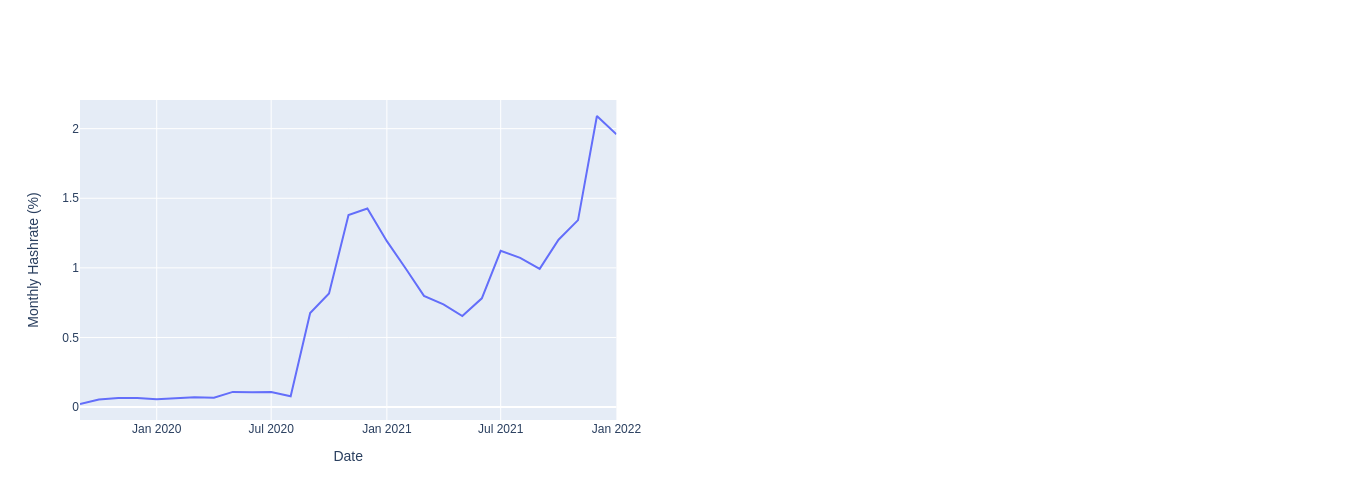

In [51]:
for country in countries_array:
    country_name = country
    country_df = all_geo_dist_df.loc[all_geo_dist_df['WB country'] == country_name]
    country_df = country_df.reset_index(drop=True)

    #plot_line(ireland_df, country_name, axis_range=[0,80])
    if max(country_df['% monthly_hashrate share']) > 0.5 and country_name == 'Singapore':
        print(country_name)
        plot_subplot_limited(country_df, country_name, axis_range=[0,80])

In [52]:
blockchain_hashrate_all_df[0:1097]
country_name = "Singapore"
singapore_df = all_geo_dist_df.loc[all_geo_dist_df['WB country'] == country_name]
singapore_df = singapore_df.reset_index(drop=True)
singapore_df[4:]['% monthly_hashrate share']
blockchain_hashrate_all_df[366:731] #0:731 2020-2021

date     hashrate
366  2021-01-01 0:00:00  137764027.0
367  2021-01-02 0:00:00  139613208.6
368  2021-01-03 0:00:00  146085344.1
369  2021-01-04 0:00:00  159954205.9
370  2021-01-05 0:00:00  145160753.3
..                  ...          ...
726  2021-12-27 0:00:00  178574456.9
727  2021-12-28 0:00:00  161682278.5
728  2021-12-29 0:00:00  174954704.4
729  2021-12-30 0:00:00  143583516.0
730  2021-12-31 0:00:00  179781041.0

[365 rows x 2 columns]

In [53]:
def total_monthly_estimates_hashrate(df, leap_year = 0):
    # take in the dataframe with daily energy consumption estimates
    # sum up the daily estimates to get monthly estimates
    # output dataframe with list of monthly estimates
    # do this for one year
    
    month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31] # Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
    
    if leap_year == 1:
        month_days[1] = 29 # add 1 extra day to February for leap years.

    jan = df.iloc[0:month_days[0]]
    feb = df.iloc[month_days[0]:sum(month_days[0:2])]
    mar = df.iloc[sum(month_days[0:2]):sum(month_days[0:3])]
    apr = df.iloc[sum(month_days[0:3]):sum(month_days[0:4])]
    may = df.iloc[sum(month_days[0:4]):sum(month_days[0:5])]
    jun = df.iloc[sum(month_days[0:5]):sum(month_days[0:6])]
    jul = df.iloc[sum(month_days[0:6]):sum(month_days[0:7])]
    aug = df.iloc[sum(month_days[0:7]):sum(month_days[0:8])]
    sep = df.iloc[sum(month_days[0:8]):sum(month_days[0:9])]
    oco = df.iloc[sum(month_days[0:9]):sum(month_days[0:10])]
    nov = df.iloc[sum(month_days[0:10]):sum(month_days[0:11])]
    dec = df.iloc[sum(month_days[0:11]):sum(month_days[0:12])]
    
    monthly_hashrates = [jan['hashrate'].mean(), feb['hashrate'].mean(), mar['hashrate'].mean(), apr['hashrate'].mean(), may['hashrate'].mean(),
                                   jun['hashrate'].mean(), jul['hashrate'].mean(), aug['hashrate'].mean(), sep['hashrate'].mean(), oco['hashrate'].mean(), 
                                   nov['hashrate'].mean(), dec['hashrate'].mean()]
    
    #return jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec
    return monthly_hashrates

In [54]:
#jan, feb, mar, apr, may, jun, jul, aug, sep, oco, nov, dec = total_monthly_estimates_hashrate(blockchain_hashrate_all_df[0:366], 1)
monthly_hashrates_2020 = total_monthly_estimates_hashrate(blockchain_hashrate_all_df[0:366], 1)
monthly_hashrates_2021 = total_monthly_estimates_hashrate(blockchain_hashrate_all_df[366:731], 0)
monthly_hashrates_2020_2021 = monthly_hashrates_2020 + monthly_hashrates_2021
monthly_hashrate_shares_sp = list(singapore_df['% monthly_hashrate share'][4:-1])

product = [x/100 * y/1000**2 for x, y in zip(monthly_hashrate_shares_sp, monthly_hashrates_2020_2021)]
print(product)
print(len(product))
print(len(monthly_hashrates_2020_2021))
print(len(monthly_hashrate_shares_sp))
singapore_df[4:]

[0.061167492026245156, 0.0728838004868069, 0.07480269069564516, 0.07462385098645333, 0.1152454195113548, 0.11830510263304665, 0.13198663858877419, 0.09524515488825804, 0.9160741582200003, 1.076916919703071, 1.7790638162801, 1.946684800248, 1.778427901971871, 1.532389150702428, 1.2752169824870645, 1.1603911958981998, 1.0545431018883875, 0.9379655265416332, 1.1259874824813285, 1.2940048150988386, 1.3565076526279003, 1.7923016711975484, 2.160700653959967, 3.621442390423644]
24
24
24


date WB country  % monthly_hashrate share
4   2020-01-01 00:00:00  Singapore                     0.056
5   2020-02-01 00:00:00  Singapore                     0.066
6   2020-03-01 00:00:00  Singapore                     0.070
7   2020-04-01 00:00:00  Singapore                     0.067
8   2020-05-01 00:00:00  Singapore                     0.109
9   2020-06-01 00:00:00  Singapore                     0.106
10  2020-07-01 00:00:00  Singapore                     0.108
11  2020-08-01 00:00:00  Singapore                     0.077
12  2020-09-01 00:00:00  Singapore                     0.675
13  2020-10-01 00:00:00  Singapore                     0.816
14  2020-11-01 00:00:00  Singapore                     1.379
15  2020-12-01 00:00:00  Singapore                     1.426
16  2021-01-01 00:00:00  Singapore                     1.192
17  2021-02-01 00:00:00  Singapore                     0.988
18  2021-03-01 00:00:00  Singapore                     0.799
19  2021-04-01 00:00:00  Singapore                     0.738
20  2021-05-01 00:00:00  Singapore                     0.654
21  2021-06-01 00:00:00  Singapore                     0.781
22  2021-07-01 00:00:00  Singapore                     1.122
23  2021-08-01 00:00:00  Singapore                     1.072
24  2021-09-01 00:00:00  Singapore                     0.993
25  2021-10-01 00:00:00  Singapore                     1.202
26  2021-11-01 00:00:00  Singapore                     1.343
27  2021-12-01 00:00:00  Singapore                     2.091
28  2022-01-01 00:00:00  Singapore                     1.960

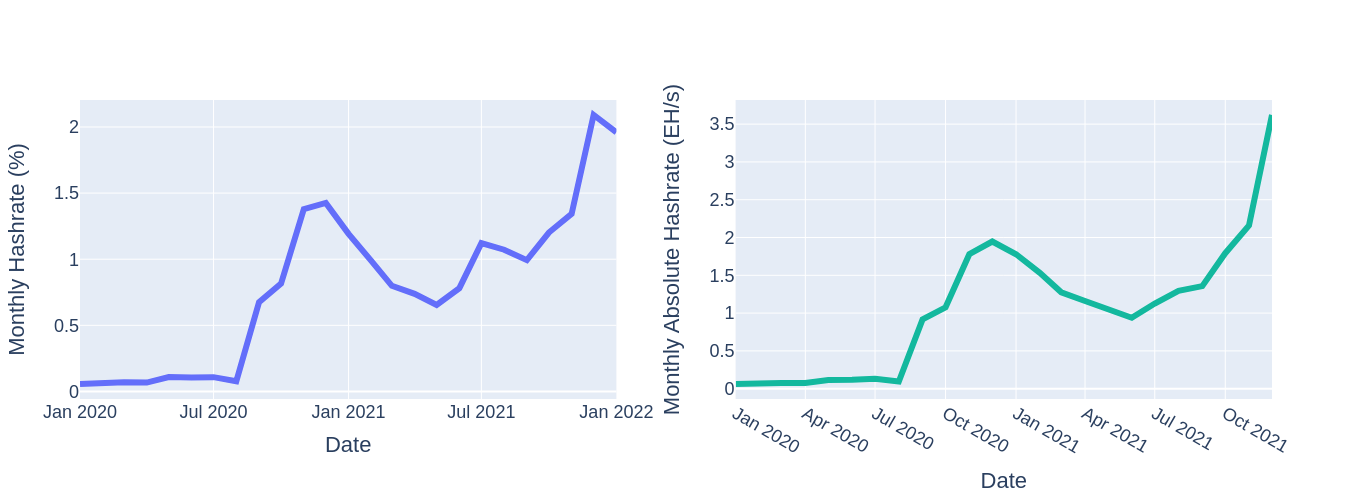

In [107]:
def plot_subplot_limited(df, hashrate_list, country_name, axis_range=0):
    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(
        go.Scatter(x=df['date'], y=df['% monthly_hashrate share'], name="Monthly Hashrate (%)", line=dict(width=6)),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(x=df['date'], y=hashrate_list, name="Monthly Absolute Hashrate (EH/s)", line=dict(color='#13B89E', width=6)),
        row=1, col=2
    )

    fig.update_layout(height=500)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_yaxes(title_text="Monthly Hashrate (%)", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=2)
    fig.update_yaxes(title_text="Monthly Absolute Hashrate (EH/s)", row=1, col=2)
    fig.update_layout(showlegend=False)
    fig.update_layout(
    font=dict(
        size=18,  # Set the font size here
    )
)
    fig.show()
plot_subplot_limited(singapore_df[4:], product, country_name, axis_range=[0,80])

In [60]:
daily_all_df = pd.read_csv('CBECI v1.2.0.csv')

In [61]:
daily_all_df

Timestamp       Date and Time  power MAX, GW  power MIN, GW  \
0     1279411200  2010-07-18 0:00:00       0.000027       0.000022   
1     1279497600  2010-07-19 0:00:00       0.000027       0.000023   
2     1279584000  2010-07-20 0:00:00       0.000027       0.000023   
3     1279670400  2010-07-21 0:00:00       0.000028       0.000024   
4     1279756800  2010-07-22 0:00:00       0.000028       0.000024   
...          ...                 ...            ...            ...   
4788  1693094400  2023-08-27 0:00:00      24.944952       7.986698   
4789  1693180800  2023-08-28 0:00:00      23.654363       7.676206   
4790  1693267200  2023-08-29 0:00:00      23.949422       7.841638   
4791  1693353600  2023-08-30 0:00:00      23.251261       7.708871   
4792  1693440000  2023-08-31 0:00:00      23.060409       7.750361   

      power GUESS, GW  annualised consumption MAX, TWh  \
0            0.000024                         0.000234   
1            0.000025                         0.000235   
2            0.000025                         0.000239   
3            0.000026                         0.000249   
4            0.000026                         0.000247   
...               ...                              ...   
4788        14.674874                       218.667446   
4789        14.009617                       207.354150   
4790        14.233534                       209.940635   
4791        13.879141                       203.820550   
4792        13.832233                       202.147549   

      annualised consumption MIN, TWh  annualised consumption GUESS, TWh  
0                            0.000197                           0.000214  
1                            0.000198                           0.000215  
2                            0.000201                           0.000219  
3                            0.000210                           0.000229  
4                            0.000208                           0.000227  
...                               ...                                ...  
4788                        70.011398                         128.639944  
4789                        67.289623                         122.808302  
4790                        68.739800                         124.771158  
4791                        67.575960                         121.664548  
4792                        67.939668                         121.253353  

[4793 rows x 8 columns]

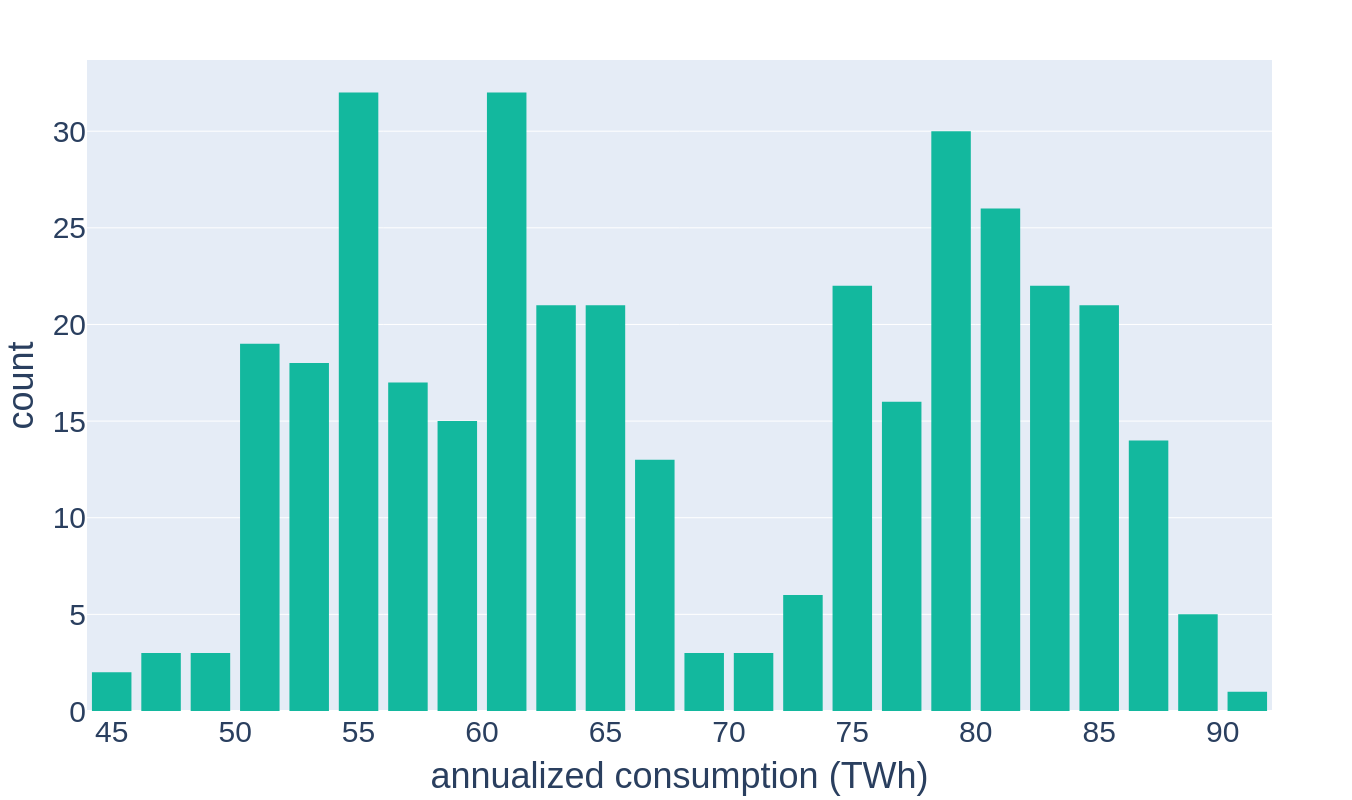

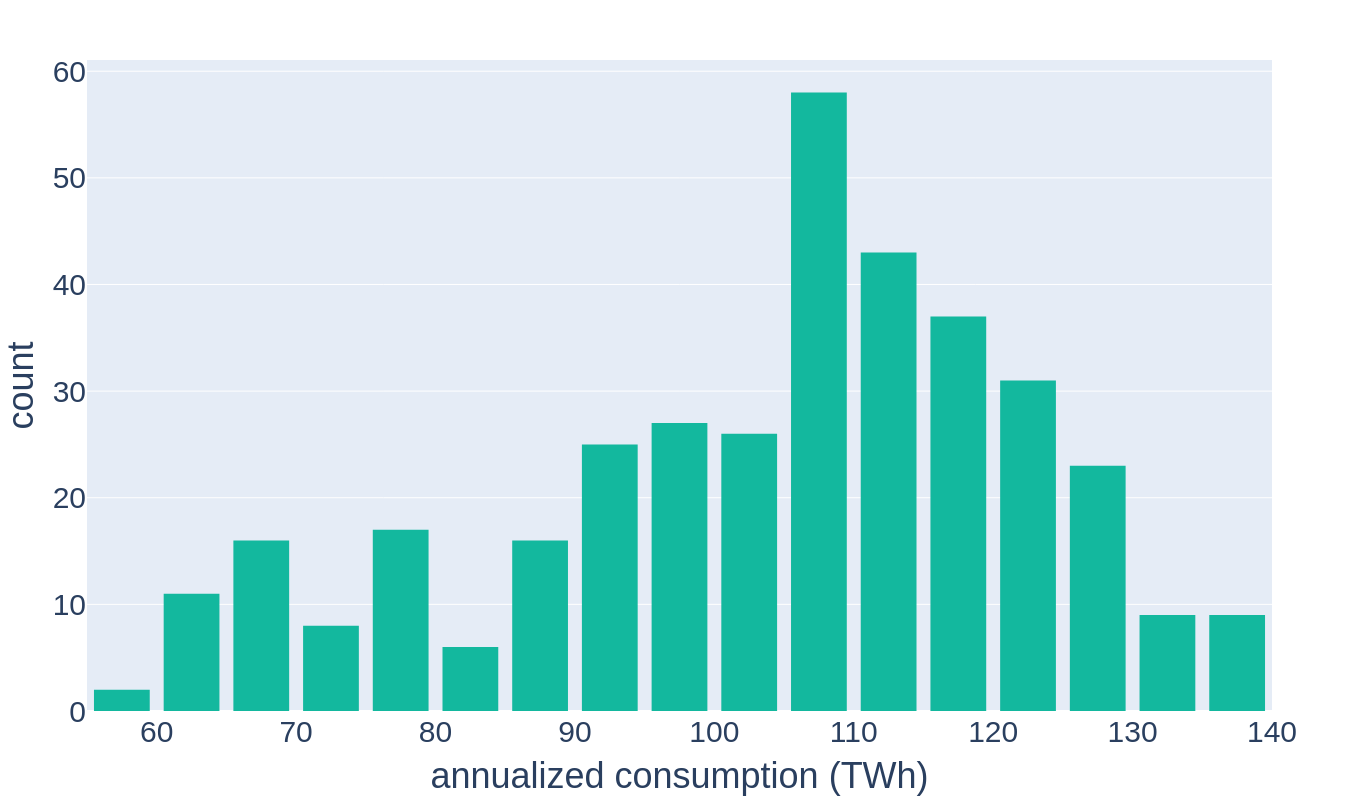

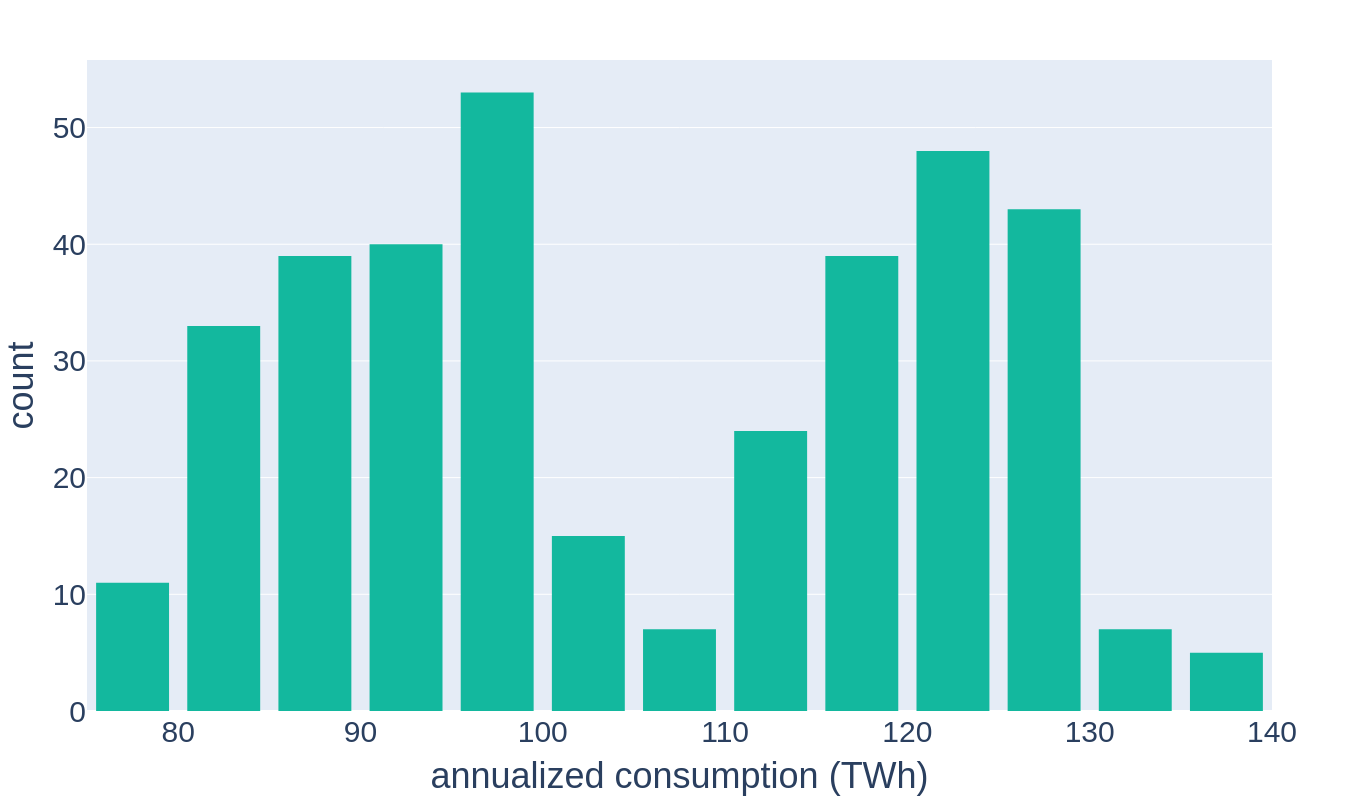

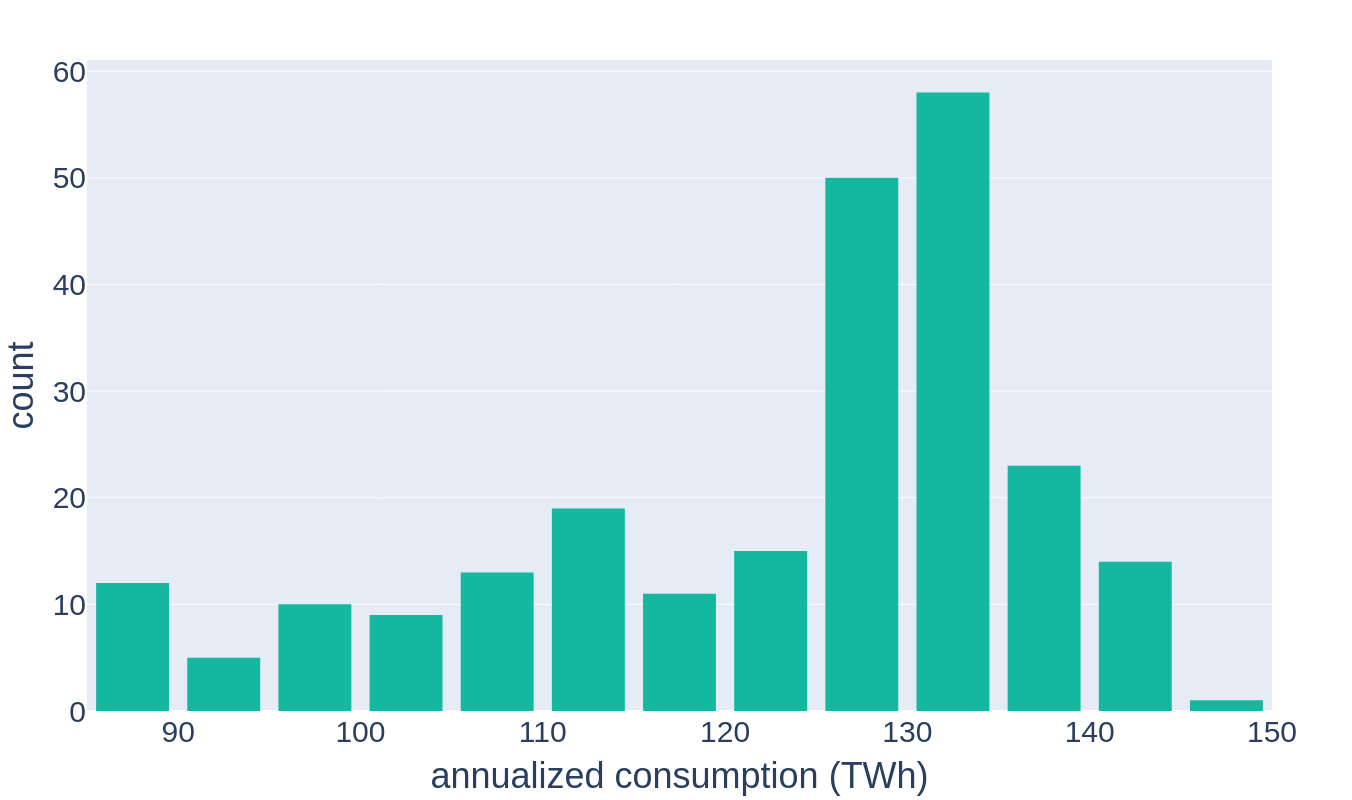

In [95]:
def plot_histo(df):
    fig = px.histogram(df, x="annualised consumption GUESS, TWh", nbins=23, color_discrete_sequence=['#13B89E'])
    # y="daily energy consumption GUESS, TWh", 
    fig.update_layout(height=800)
    fig.update_layout(showlegend=False)
    fig.update_layout(bargap=0.2)
    fig.update_layout(
        font=dict(
        size=30,  # Set the font size here
            )
        )
    fig.update_layout(xaxis_title='annualized consumption (TWh)')

    fig.show()
    
plot_histo(daily_all_df[3454:3819]) #2020
plot_histo(daily_all_df[3820:4184]) #2021
plot_histo(daily_all_df[4185:4549]) #2022
plot_histo(daily_all_df[4550:4790]) #2023